<a href="https://colab.research.google.com/github/Llontaco/Planificacion-de-Procesos/blob/main/Planificaci%C3%B3nProcesos_SO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo FCFS



## Algortimo FCFS en Python



In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from IPython.display import display


# === Simulaci√≥n FCFS ===


def simular_fcfs(procesos_prueba):
    """Simula el algoritmo FCFS (First Come, First Served)."""
    procesos = [p.copy() for p in procesos_prueba]
    tiempo_actual = 0
    cola_listos = []
    terminados = []
    pendientes = sorted(procesos, key=lambda x: x["llegada"])
    idx = 0

    while idx < len(pendientes) or cola_listos:
        while idx < len(pendientes) and pendientes[idx]["llegada"] <= tiempo_actual:
            cola_listos.append(pendientes[idx])
            idx += 1

        cola_listos.sort(key=lambda x: x["llegada"])

        if cola_listos:
            p = cola_listos.pop(0)
            inicio = max(tiempo_actual, p["llegada"])
            fin = inicio + p["duracion"]
            retorno = fin - p["llegada"]
            espera = inicio - p["llegada"]
            respuesta = espera

            p.update({
                "inicio": inicio,
                "fin": fin,
                "retorno": retorno,
                "espera": espera,
                "respuesta": respuesta
            })

            terminados.append(p)
            tiempo_actual = fin
        else:
            tiempo_actual = pendientes[idx]["llegada"]

    return terminados



# === M√©tricas globales ===


def calcular_metricas_globales(procesos_terminados):
    """Calcula m√©tricas promedio y globales del simulador."""
    if not procesos_terminados:
        return {}

    n = len(procesos_terminados)
    avg_retorno = sum(p["retorno"] for p in procesos_terminados) / n
    avg_espera = sum(p["espera"] for p in procesos_terminados) / n
    avg_respuesta = sum(p["respuesta"] for p in procesos_terminados) / n
    tiempo_total = max(p["fin"] for p in procesos_terminados)
    throughput = n / tiempo_total if tiempo_total > 0 else 0
    min_r, max_r = min(p["retorno"] for p in procesos_terminados), max(p["retorno"] for p in procesos_terminados)
    fairness = min_r / max_r if max_r > 0 else 0

    return {
        "Promedio de retorno": avg_retorno,
        "Promedio de espera": avg_espera,
        "Promedio de respuesta": avg_respuesta,
        "Throughput": throughput,
        "Fairness": fairness
    }



# === Generaci√≥n de escenarios ===


def generar_escenario_A():
    """Escenario A: Mezcla de procesos cortos y largos."""
    procesos = []
    for i in range(1, 9):
        duracion = random.choice([random.randint(1, 4), random.randint(8, 20)])
        llegada = random.randint(0, 3)
        procesos.append({"id": f"{i}", "llegada": llegada, "duracion": duracion})
    return procesos


def generar_escenario_B():
    """Escenario B: CPU-bound vs I/O-bound."""
    procesos = []
    for i in range(1, 6):
        procesos.append({"id": f"{i}", "llegada": random.randint(0, 10),
                         "duracion": random.randint(10, 25), "tipo": "CPU"})
    for i in range(6, 11):
        procesos.append({"id": f"{i}", "llegada": random.randint(0, 10),
                         "duracion": random.randint(1, 3), "tipo": "IO"})
    return procesos


def generar_escenario_C():
    """Escenario C: Alta concurrencia vs baja concurrencia."""
    escenarios = []

    # Baja concurrencia
    baja = [
        {"id": f"{i}", "llegada": random.randint(0, 20), "duracion": random.randint(1, 10)}
        for i in range(1, random.randint(4, 6))
    ]
    escenarios.append(("Baja concurrencia", baja))

    # Alta concurrencia
    alta = [
        {"id": f"{i}", "llegada": random.randint(0, 5), "duracion": random.randint(1, 10)}
        for i in range(1, random.randint(20, 30))
    ]
    escenarios.append(("Alta concurrencia", alta))
    return escenarios


# === Diagrama de Gantt ===


def diagrama_gantt(terminados, titulo="Diagrama de Gantt - FCFS"):
    fig, ax = plt.subplots()
    tiene_tipo = any("tipo" in p for p in terminados)
    colores_tipo = {"CPU": "orange", "IO": "skyblue"}

    for i, p in enumerate(terminados, start=1):
        p["mostrar_id"] = f"P{i}"

    if tiene_tipo:
        for p in terminados:
            color = colores_tipo.get(p.get("tipo"), "lightgray")
            ax.barh(p["mostrar_id"], p["duracion"], left=p["inicio"], height=0.5, color=color)

        handles = [
            plt.Rectangle((0, 0), 1, 1, color=colores_tipo["CPU"]),
            plt.Rectangle((0, 0), 1, 1, color=colores_tipo["IO"])
        ]
        ax.legend(handles, ["CPU-bound", "I/O-bound"])
    else:
        colores = plt.cm.tab10.colors
        for i, p in enumerate(terminados):
            ax.barh(p["mostrar_id"], p["duracion"], left=p["inicio"], height=0.5,
                    color=colores[i % len(colores)])

    ax.set_xlabel("Tiempo")
    ax.set_ylabel("Procesos")
    ax.set_title(titulo)
    plt.tight_layout()
    plt.show()


# === Funci√≥n para ejecutar y mostrar resultados ===


def ejecutar_y_mostrar(procesos, nombre_escenario=""):
    print(f"\n{'='*60}")
    print(f"=== {nombre_escenario} ===")
    print(f"{'='*60}")

    resultados = simular_fcfs(procesos)
    tiene_tipo = any("tipo" in p for p in procesos)
    columnas = (
        ["id", "tipo", "llegada", "duracion", "inicio", "fin", "retorno", "espera", "respuesta"]
        if tiene_tipo
        else ["id", "llegada", "duracion", "inicio", "fin", "retorno", "espera", "respuesta"]
    )

    df = pd.DataFrame(resultados)[columnas]
    display(df.style.hide(axis="index").set_caption(""))

    print("\nM√©tricas globales:")
    metricas = calcular_metricas_globales(resultados)
    for k, v in metricas.items():
        print(f"  {k}: {v:.2f}")

    diagrama_gantt(resultados, f"Diagrama de Gantt - {nombre_escenario}")




# === Ejecuci√≥n de los escenarios ===


if __name__ == "__main__":
    random.seed(42)


    print("EJECUTANDO TODOS LOS ESCENARIOS AUTOM√ÅTICAMENTE")

    # --- Escenario A ---
    procesos_A = generar_escenario_A()
    ejecutar_y_mostrar(procesos_A, "Escenario A: Mezcla de procesos cortos y largos")

    # --- Escenario B ---
    procesos_B = generar_escenario_B()
    ejecutar_y_mostrar(procesos_B, "Escenario B: CPU-bound vs I/O-bound")

    # --- Escenario C ---
    print("\n" + "="*60)
    print("=== Escenario C: Alta concurrencia vs baja concurrencia ===")
    print("="*60)
    escenarios_C = generar_escenario_C()
    for nombre, procesos_C in escenarios_C:
        ejecutar_y_mostrar(procesos_C, f"Escenario C - {nombre}")

## Escenario A: Mezcla de procesos cortos y largos
En este escenario se busca analizar c√≥mo el algoritmo FCFS (First Come, First Served) gestiona una cola de procesos que poseen duraciones muy variadas, combinando trabajos cortos y largos.
Todos los procesos llegan en diferentes momentos, lo que permite observar el efecto del orden de llegada sobre el tiempo de espera y el rendimiento general del sistema.
Este tipo de situaci√≥n es com√∫n en entornos multitarea donde se ejecutan simult√°neamente tareas r√°pidas y operaciones que requieren mayor tiempo de procesamiento, como aplicaciones de oficina, servicios web y procesamiento de archivos.

### Experimento 1- Duraciones Similares


=== Escenario A - Experimento 1 (Duraciones similares) ===



M√©tricas globales:
  Promedio de retorno: 11.20
  Promedio de espera: 6.80
  Promedio de respuesta: 6.80
  Throughput: 0.23
  Fairness: 0.22


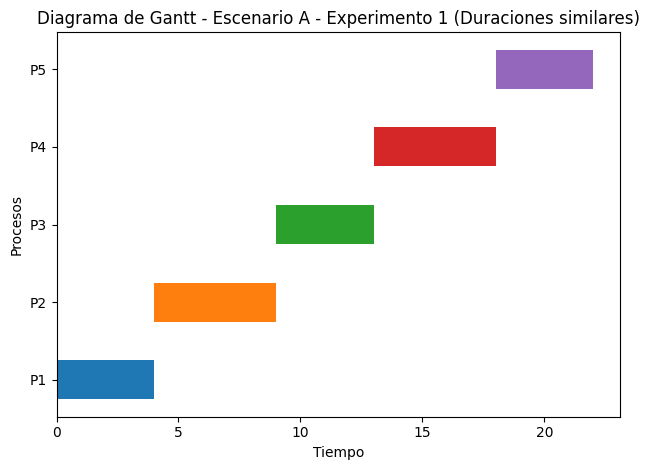

In [ ]:
procesos_exp1_A = [
    {"id": "P1", "llegada": 0, "duracion": 4},
    {"id": "P2", "llegada": 1, "duracion": 5},
    {"id": "P3", "llegada": 2, "duracion": 4},
    {"id": "P4", "llegada": 3, "duracion": 5},
    {"id": "P5", "llegada": 4, "duracion": 4},
]
ejecutar_y_mostrar(procesos_exp1_A, "Escenario A - Experimento 1 (Duraciones similares)")


### Experimento 2 ‚Äî Procesos con duraciones variadas


=== Escenario A - Experimento 2 (Duraciones variadas) ===



M√©tricas globales:
  Promedio de retorno: 13.20
  Promedio de espera: 7.80
  Promedio de respuesta: 7.80
  Throughput: 0.19
  Fairness: 0.09


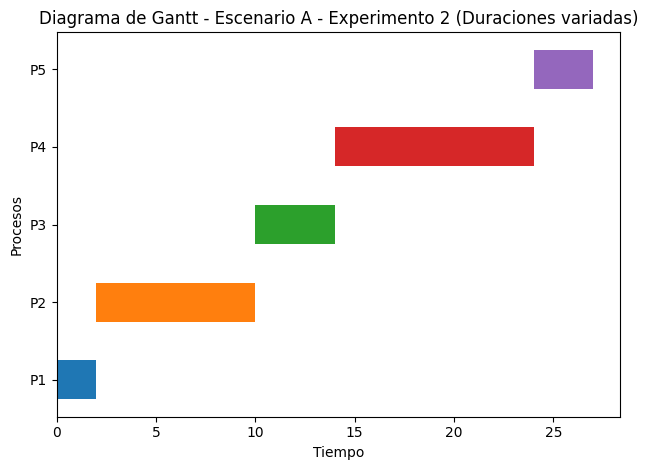

In [ ]:
procesos_exp2_A = [
    {"id": "P1", "llegada": 0, "duracion": 2},
    {"id": "P2", "llegada": 1, "duracion": 8},
    {"id": "P3", "llegada": 2, "duracion": 4},
    {"id": "P4", "llegada": 3, "duracion": 10},
    {"id": "P5", "llegada": 5, "duracion": 3},
]
ejecutar_y_mostrar(procesos_exp2_A, "Escenario A - Experimento 2 (Duraciones variadas)")


### Experimento 3 ‚Äî Muchos procesos con duraciones variadas


=== Escenario A - Experimento 3 (Muchos procesos variados) ===



M√©tricas globales:
  Promedio de retorno: 63.64
  Promedio de espera: 55.29
  Promedio de respuesta: 55.29
  Throughput: 0.12
  Fairness: 0.12


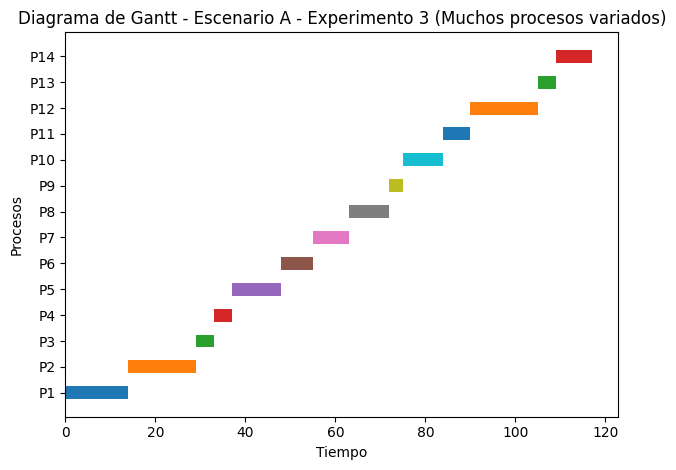

In [ ]:
procesos_exp3_A = [
    {"id": f"P{i}", "llegada": random.randint(0, 5), "duracion": random.randint(2, 15)}
    for i in range(1, 15)
]
ejecutar_y_mostrar(procesos_exp3_A, "Escenario A - Experimento 3 (Muchos procesos variados)")


##Escenario B: Procesos de CPU-bound vs I/O-bound
En este escenario se busca analizar c√≥mo el algoritmo FCFS (First Come, First Served) gestiona una cola de procesos con diferentes tipos de carga de trabajo: CPU-bound (procesos que consumen mucho tiempo de CPU) e I/O-bound (procesos que requieren m√°s operaciones de entrada y salida).
Cada proceso llega en momentos distintos y presenta diferentes duraciones, lo que permite observar c√≥mo el orden de llegada influye directamente en el rendimiento general del sistema.
Este tipo de escenario es com√∫n en entornos donde coexisten tareas pesadas de c√°lculo con operaciones frecuentes de acceso a disco, red o dispositivos externos, como en servidores multitarea o sistemas operativos de prop√≥sito general.

###Experimento 1 ‚Äî Mezcla equilibrada de procesos CPU e I/O


=== Escenario B - Experimento 1 (Mezcla equilibrada CPU/I-O) ===



M√©tricas globales:
  Promedio de retorno: 18.20
  Promedio de espera: 11.20
  Promedio de respuesta: 11.20
  Throughput: 0.14
  Fairness: 0.36


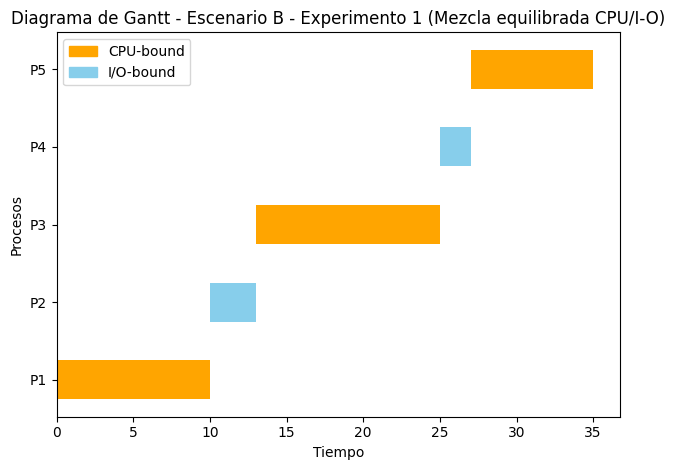

In [ ]:
procesos_exp1_B = [
    {"id": "P1", "llegada": 0, "duracion": 10, "tipo": "CPU"},
    {"id": "P2", "llegada": 2, "duracion": 3, "tipo": "IO"},
    {"id": "P3", "llegada": 4, "duracion": 12, "tipo": "CPU"},
    {"id": "P4", "llegada": 6, "duracion": 2, "tipo": "IO"},
    {"id": "P5", "llegada": 7, "duracion": 8, "tipo": "CPU"},
]
ejecutar_y_mostrar(procesos_exp1_B, "Escenario B - Experimento 1 (Mezcla equilibrada CPU/I-O)")


###Experimento 2 ‚Äî Sistema dominado por procesos CPU-bound


=== Escenario B - Experimento 2 (Dominado por CPU-bound) ===



M√©tricas globales:
  Promedio de retorno: 42.40
  Promedio de espera: 31.20
  Promedio de respuesta: 31.20
  Throughput: 0.09
  Fairness: 0.38


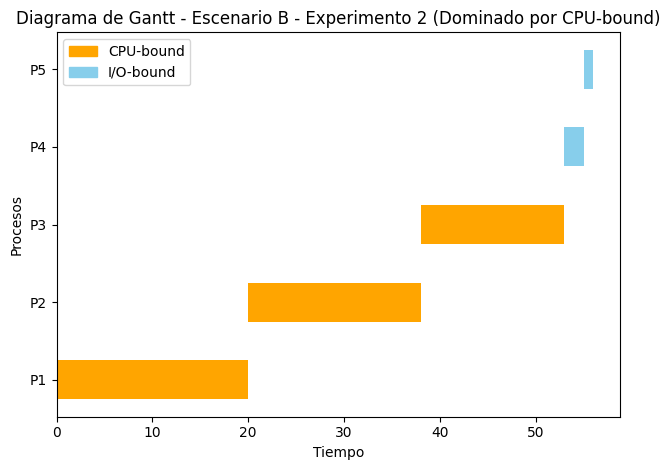

In [ ]:
procesos_exp2_B = [
    {"id": "P1", "llegada": 0, "duracion": 20, "tipo": "CPU"},
    {"id": "P2", "llegada": 1, "duracion": 18, "tipo": "CPU"},
    {"id": "P3", "llegada": 2, "duracion": 15, "tipo": "CPU"},
    {"id": "P4", "llegada": 3, "duracion": 2, "tipo": "IO"},
    {"id": "P5", "llegada": 4, "duracion": 1, "tipo": "IO"},
]
ejecutar_y_mostrar(procesos_exp2_B, "Escenario B - Experimento 2 (Dominado por CPU-bound)")


###Experimento 3 ‚Äî Sistema dominado por procesos I/O-bound


=== Escenario B - Experimento 3 (Dominado por I/O-bound) ===



M√©tricas globales:
  Promedio de retorno: 8.80
  Promedio de espera: 4.60
  Promedio de respuesta: 4.60
  Throughput: 0.24
  Fairness: 0.12


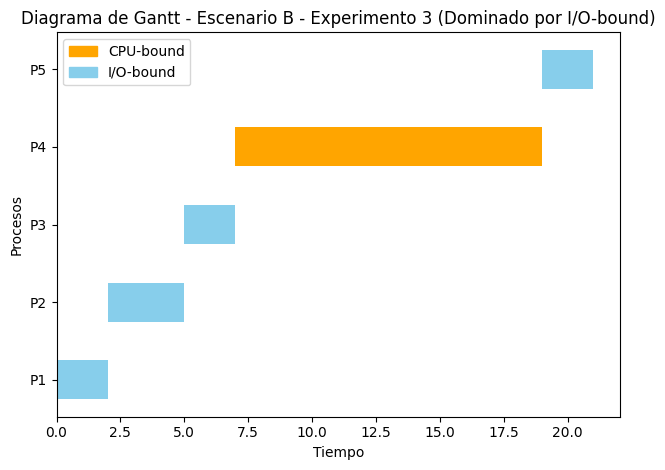

In [ ]:
procesos_exp3_B = [
    {"id": "P1", "llegada": 0, "duracion": 2, "tipo": "IO"},
    {"id": "P2", "llegada": 1, "duracion": 3, "tipo": "IO"},
    {"id": "P3", "llegada": 2, "duracion": 2, "tipo": "IO"},
    {"id": "P4", "llegada": 3, "duracion": 12, "tipo": "CPU"},
    {"id": "P5", "llegada": 4, "duracion": 2, "tipo": "IO"},
]
ejecutar_y_mostrar(procesos_exp3_B, "Escenario B - Experimento 3 (Dominado por I/O-bound)")


###Experimento 4 ‚Äî Sistema aleatorio de procesos


=== Escenario B - Experimento 4 (Sistema aleatorio de procesos) ===



M√©tricas globales:
  Promedio de retorno: 45.73
  Promedio de espera: 36.09
  Promedio de respuesta: 36.09
  Throughput: 0.10
  Fairness: 0.04


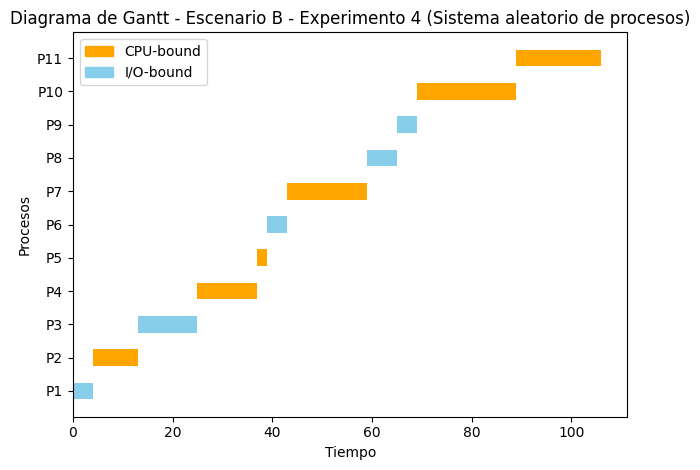

In [ ]:
procesos_exp4_B = [
    {"id": f"P{i}", "llegada": random.randint(0, 8),
     "duracion": random.randint(1, 20),
     "tipo": random.choice(["CPU", "IO"])}
    for i in range(1, 12)
]
ejecutar_y_mostrar(procesos_exp4_B, "Escenario B - Experimento 4 (Sistema aleatorio de procesos)")


##Escenario C: Alta concurrencia vs Baja concurrencia
En este escenario se busca analizar c√≥mo el algoritmo FCFS (First Come, First Served) gestiona una cola de procesos que poseen duraciones muy variadas, combinando trabajos cortos y largos.
Todos los procesos llegan en diferentes momentos, lo que permite observar el efecto del orden de llegada sobre el tiempo de espera y el rendimiento general del sistema.
Este tipo de situaci√≥n es com√∫n en entornos multitarea donde se ejecutan simult√°neamente tareas r√°pidas y operaciones que requieren mayor tiempo de procesamiento, como aplicaciones de oficina, servicios web y procesamiento de archivos.

###Experimento 1 ‚Äî Alta concurrencia


=== Escenario C - Experimento 1 (Alta concurrencia) ===



M√©tricas globales:
  Promedio de retorno: 50.74
  Promedio de espera: 45.32
  Promedio de respuesta: 45.32
  Throughput: 0.18
  Fairness: 0.03


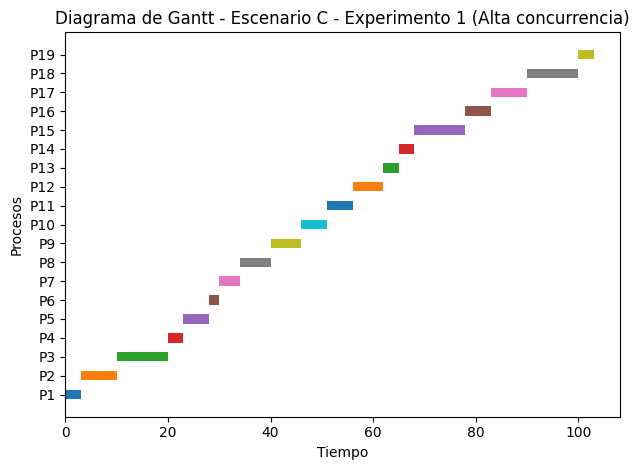

In [ ]:
procesos_exp1_C = [
    {"id": f"P{i}", "llegada": random.randint(0, 3), "duracion": random.randint(2, 10)}
    for i in range(1, 20)
]
ejecutar_y_mostrar(procesos_exp1_C, "Escenario C - Experimento 1 (Alta concurrencia)")


###Experimento 2 ‚Äî Baja concurrencia


=== Escenario C - Experimento 2 (Baja concurrencia) ===



M√©tricas globales:
  Promedio de retorno: 6.33
  Promedio de espera: 0.00
  Promedio de respuesta: 0.00
  Throughput: 0.12
  Fairness: 0.62


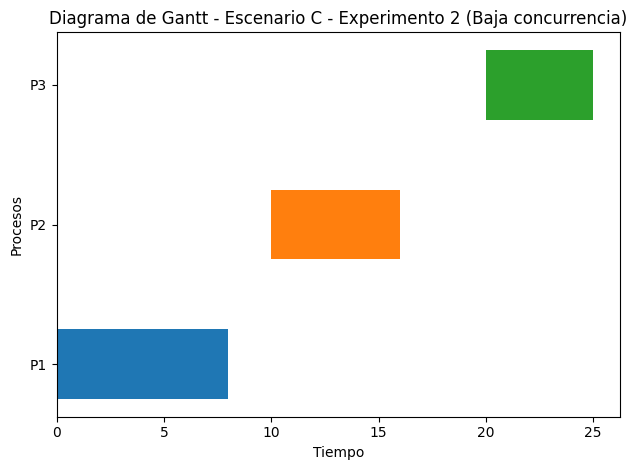

In [ ]:
procesos_exp2_C = [
    {"id": "P1", "llegada": 0, "duracion": 8},
    {"id": "P2", "llegada": 10, "duracion": 6},
    {"id": "P3", "llegada": 20, "duracion": 5},
]
ejecutar_y_mostrar(procesos_exp2_C, "Escenario C - Experimento 2 (Baja concurrencia)")


#Algoritmo SJF





## Algortimo SJF en Python

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

def simular_sjf(procesosPrueba):
    procesos = [p.copy() for p in procesosPrueba]
    tiempo_actual = 0
    terminados = []

    pendientes = sorted(procesos, key=lambda x: x["llegada"])

    while pendientes:
        # Procesos que ya han llegado en tiempo_actual
        llegados = [p for p in pendientes if p["llegada"] <= tiempo_actual]

        if not llegados:
            # Si no hay ninguno, avanzar al siguiente tiempo de llegada
            tiempo_actual = pendientes[0]["llegada"]
            llegados = [p for p in pendientes if p["llegada"] <= tiempo_actual]

        # Elegir el de menor duracion entre los llegados
        elegido = min(llegados, key=lambda x: x["duracion"])

        inicio = max(tiempo_actual, elegido["llegada"])
        fin = inicio + elegido["duracion"]
        retorno = fin - elegido["llegada"]
        espera = inicio - elegido["llegada"]
        respuesta = espera

        elegido.update({
            "inicio": inicio,
            "fin": fin,
            "retorno": retorno,
            "espera": espera,
            "respuesta": respuesta
        })

        tiempo_actual = fin
        terminados.append(elegido)
        pendientes.remove(elegido)

    # --- M√©tricas globales ---
    n = len(terminados)
    promedio_retorno = sum(p["retorno"] for p in terminados) / n
    promedio_espera = sum(p["espera"] for p in terminados) / n
    promedio_respuesta = sum(p["respuesta"] for p in terminados) / n
    throughput = n / tiempo_actual if tiempo_actual > 0 else 0
    min_retorno = min(p["retorno"] for p in terminados)
    max_retorno = max(p["retorno"] for p in terminados)
    fairness = min_retorno / max_retorno if max_retorno > 0 else 0

    # --- Mostrar tabla ---
    tiene_tipo = any("tipo" in p for p in procesosPrueba)
    columnas = ["id", "tipo", "llegada", "duracion", "inicio", "fin", "retorno", "espera", "respuesta"] if tiene_tipo \
        else ["id", "llegada", "duracion", "inicio", "fin", "retorno", "espera", "respuesta"]
    df = pd.DataFrame(terminados)[columnas]
    display(df.style.set_caption(""))

    # --- Impresi√≥n de m√©tricas ---
    print("\n--- M√©tricas Globales (SJF correcto) ---")
    print(f"Promedio Retorno:   {promedio_retorno:.2f}")
    print(f"Promedio Espera:    {promedio_espera:.2f}")
    print(f"Promedio Respuesta: {promedio_respuesta:.2f}")
    print(f"Throughput:         {throughput:.2f} procesos/unidad tiempo")
    print(f"Equidad (Fairness): {fairness:.2f}")

    # --- Diagrama de Gantt ---
    fig, ax = plt.subplots()
    colores_tipo = {"CPU": "orange", "IO": "skyblue"}

    if tiene_tipo:
        # Detectar los tipos presentes en esta simulaci√≥n
        tipos_presentes = sorted(set(p["tipo"] for p in terminados))
        for p in terminados:
            color = colores_tipo.get(p.get("tipo"), "lightgray")
            ax.barh(p["id"], p["duracion"], left=p["inicio"], height=0.5, color=color)
            ax.text(p["inicio"] + p["duracion"]/2, p["id"], p.get("tipo", ""), ha="center", va="center", fontsize=8)

        # Mostrar solo las etiquetas correspondientes a los tipos que realmente aparecen
        handles = []
        labels = []
        for tipo in tipos_presentes:
            handles.append(plt.Rectangle((0, 0), 1, 1, color=colores_tipo.get(tipo, "lightgray")))
            labels.append("CPU-bound" if tipo == "CPU" else "I/O-bound")

        ax.legend(handles, labels)

    else:
        # Caso sin tipo: colores autom√°ticos
        colores = plt.cm.tab10.colors
        for i, p in enumerate(terminados):
            ax.barh(p["id"], p["duracion"], left=p["inicio"], height=0.5, color=colores[i % len(colores)])

    ax.set_xlabel("Tiempo")
    ax.set_ylabel("Procesos")
    ax.set_title("Diagrama de Gantt - SJF")
    plt.show()

## Escenario: Mezcla de procesos cortos y largos
En este escenario se busca analizar c√≥mo el algoritmo SJF (Shortest Job First) maneja una cola de procesos que presentan diferentes duraciones.  
Todos los procesos llegan al mismo tiempo (instante 0), pero tienen duraciones distintas.  
Este tipo de escenario es com√∫n en sistemas donde coexisten tareas cortas e intensivas en CPU.


### Experimento 1 (Procesos con duraciones similares)  


#### Tabla de procesos

| Proceso | Tiempo de llegada | Duraci√≥n (CPU burst) |
|----------|------------------|----------------------|
| P1 | 0 | 2 |
| P2 | 0 | 8 |
| P3 | 0 | 4 |
| P4 | 0 | 1 |
| P5 | 0 | 10 |



--- M√©tricas Globales (SJF correcto) ---
Promedio Retorno:   10.20
Promedio Espera:    5.20
Promedio Respuesta: 5.20
Throughput:         0.20 procesos/unidad tiempo
Equidad (Fairness): 0.04


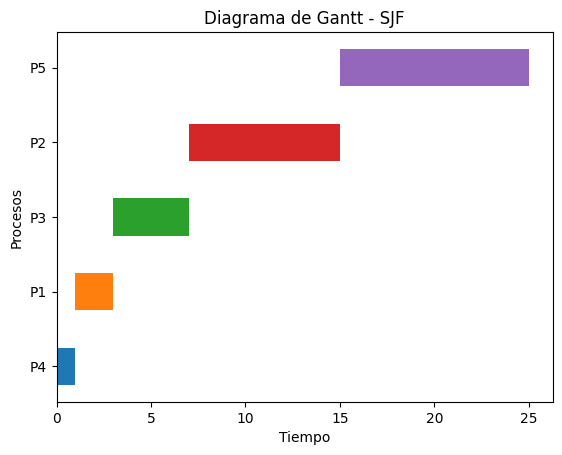

In [ ]:
# Definici√≥n de los procesos
procesos_exp1 = [
    {"id": "P1", "llegada": 0, "duracion": 2},
    {"id": "P2", "llegada": 0, "duracion": 8},
    {"id": "P3", "llegada": 0, "duracion": 4},
    {"id": "P4", "llegada": 0, "duracion": 1},
    {"id": "P5", "llegada": 0, "duracion": 10},
]

simular_sjf(procesos_exp1)

### Experimento 2 (Procesos con duraciones variadas)  

#### Tabla de procesos

| Proceso | Tiempo de llegada | Duraci√≥n (CPU burst) |
|----------|------------------|----------------------|
| P1 | 0 | 3 |
| P2 | 0 | 18 |
| P3 | 0 | 26 |
| P4 | 0 | 12 |
| P5 | 0 | 40 |
| P6 | 0 | 8 |


--- M√©tricas Globales (SJF correcto) ---
Promedio Retorno:   42.00
Promedio Espera:    24.17
Promedio Respuesta: 24.17
Throughput:         0.06 procesos/unidad tiempo
Equidad (Fairness): 0.03


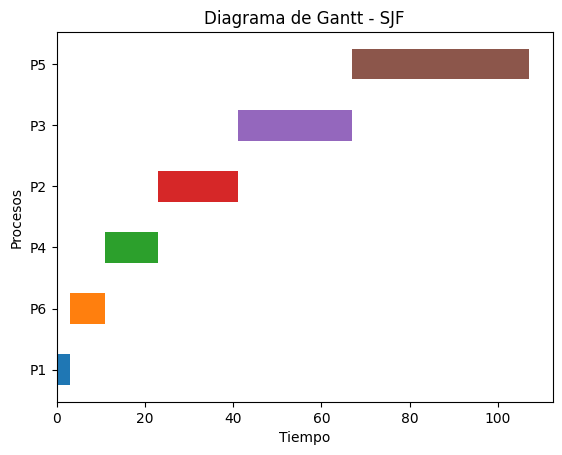

In [ ]:
# Definici√≥n de los procesos
procesos_exp2 = [
    {"id": "P1", "llegada": 0, "duracion": 3},
    {"id": "P2", "llegada": 0, "duracion": 18},
    {"id": "P3", "llegada": 0, "duracion": 26},
    {"id": "P4", "llegada": 0, "duracion": 12},
    {"id": "P5", "llegada": 0, "duracion": 40},
    {"id": "P6", "llegada": 0, "duracion": 8},
]

simular_sjf(procesos_exp2)

### Experimento 3 (Muchos procesos con duraciones variadas)  

#### Tabla de procesos

| Proceso | Tiempo de llegada | Duraci√≥n (CPU burst) |
|----------|------------------|----------------------|
| P1 | 0 | 72 |
| P2 | 0 | 15 |
| P3 | 0 | 38 |
| P4 | 0 | 5 |
| P5 | 0 | 61 |
| P6 | 0 | 29|
| P7 | 0 | 47 |
| P8 | 0 | 80 |
| P9 | 0 | 3 |
| P10 | 0 | 55|



--- M√©tricas Globales (SJF correcto) ---
Promedio Retorno:   148.80
Promedio Espera:    108.30
Promedio Respuesta: 108.30
Throughput:         0.02 procesos/unidad tiempo
Equidad (Fairness): 0.01


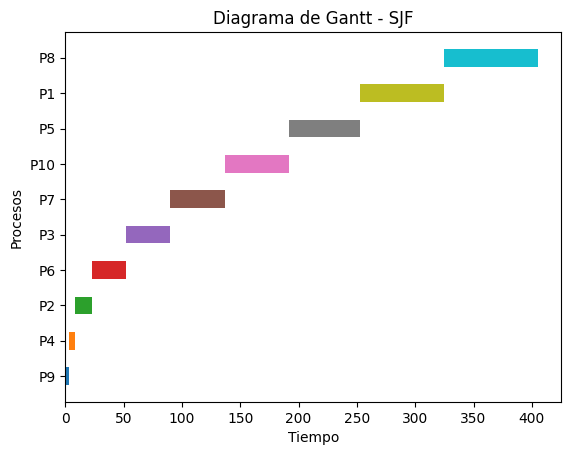

In [ ]:
# Definici√≥n de los procesos
procesos_exp3 = [
    {"id": "P1", "llegada": 0, "duracion": 72},
    {"id": "P2", "llegada": 0, "duracion": 15},
    {"id": "P3", "llegada": 0, "duracion": 38},
    {"id": "P4", "llegada": 0, "duracion": 5},
    {"id": "P5", "llegada": 0, "duracion": 61},
    {"id": "P6", "llegada": 0, "duracion": 29},
    {"id": "P7", "llegada": 0, "duracion": 47},
    {"id": "P8", "llegada": 0, "duracion": 80},
    {"id": "P9", "llegada": 0, "duracion": 3},
    {"id": "P10","llegada": 0, "duracion": 55},
]

simular_sjf(procesos_exp3)

## Escenario: Procesos de CPU-bound vs I/O-bound
En este escenario se busca analizar c√≥mo el algoritmo SJF (Shortest Job First) maneja una cola de procesos que presentan diferentes prioridades (CPU-bound y I/O-bound).  
Todos los procesos llegan a tiempos distintos, pero tienen duraciones y prioridades distintas.  
Este tipo de escenario son comunes en tareas computacionalmente intensivas como simulaciones, procesamiento de datos y criptograf√≠a.

### Experimento 1 (Mezcla equilibrada de procesos CPU e I/O)  


#### Tabla de procesos

| Proceso | Tipo | Tiempo de llegada | Duraci√≥n (CPU burst) |
|----------|------|------------------|----------------------|
| P1 | CPU | 0 | 10 |
| P2 | IO  | 1 | 3  |
| P3 | CPU | 2 | 8  |
| P4 | IO  | 3 | 2  |
| P5 | IO  | 4 | 1  |
| P6 | CPU | 5 | 12 |


--- M√©tricas Globales (SJF correcto) ---
Promedio Retorno:   15.83
Promedio Espera:    9.83
Promedio Respuesta: 9.83
Throughput:         0.17 procesos/unidad tiempo
Equidad (Fairness): 0.23


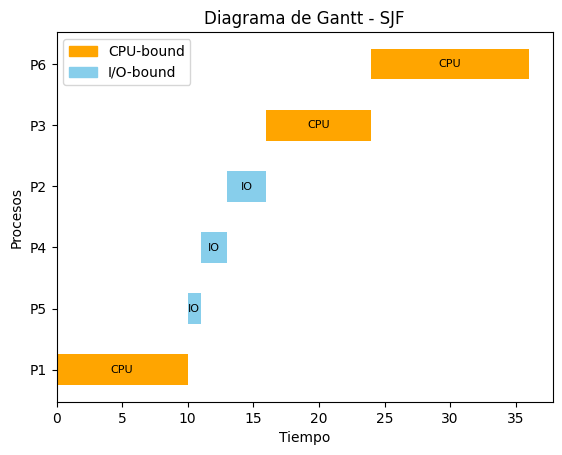

In [ ]:
procesos_exp4 = [
    {"id": "P1", "llegada": 0, "duracion": 10, "tipo": "CPU"},
    {"id": "P2", "llegada": 1, "duracion": 3,  "tipo": "IO"},
    {"id": "P3", "llegada": 2, "duracion": 8,  "tipo": "CPU"},
    {"id": "P4", "llegada": 3, "duracion": 2,  "tipo": "IO"},
    {"id": "P5", "llegada": 4, "duracion": 1,  "tipo": "IO"},
    {"id": "P6", "llegada": 5, "duracion": 12, "tipo": "CPU"},
]
simular_sjf(procesos_exp4)

### Experimento 2 (Sistema dominado por procesos CPU-bound)  


#### Tabla de procesos

| Proceso | Tipo | Tiempo de llegada | Duraci√≥n (CPU burst) |
|----------|------|------------------|----------------------|
| P1 | CPU | 0 | 12 |
| P2 | CPU | 1 | 15 |
| P3 | CPU | 3 | 10 |
| P4 | CPU | 4 | 9  |


--- M√©tricas Globales (SJF correcto) ---
Promedio Retorno:   24.00
Promedio Espera:    14.20
Promedio Respuesta: 14.20
Throughput:         0.10 procesos/unidad tiempo
Equidad (Fairness): 0.19


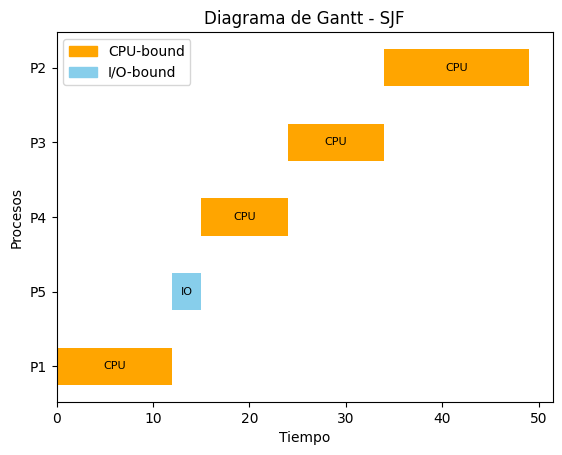

In [ ]:
procesos_exp5 = [
    {"id": "P1", "llegada": 0, "duracion": 12, "tipo": "CPU"},
    {"id": "P2", "llegada": 1, "duracion": 15, "tipo": "CPU"},
    {"id": "P3", "llegada": 3, "duracion": 10, "tipo": "CPU"},
    {"id": "P4", "llegada": 4, "duracion": 9,  "tipo": "CPU"},
    {"id": "P5", "llegada": 6, "duracion": 3,  "tipo": "IO"},
]
simular_sjf(procesos_exp5)


### Experimento 3 (Sistema dominado por I/O-bound)  


#### Tabla de procesos
| Proceso | Tipo | Tiempo de llegada | Duraci√≥n (CPU burst) |
|----------|------|------------------|----------------------|
| P1 | IO  | 0 | 2 |
| P2 | IO  | 1 | 1 |
| P3 | IO  | 2 | 3 |
| P4 | CPU | 3 | 8 |
| P5 | CPU | 4 | 10 |



--- M√©tricas Globales (SJF correcto) ---
Promedio Retorno:   7.80
Promedio Espera:    3.00
Promedio Respuesta: 3.00
Throughput:         0.21 procesos/unidad tiempo
Equidad (Fairness): 0.10


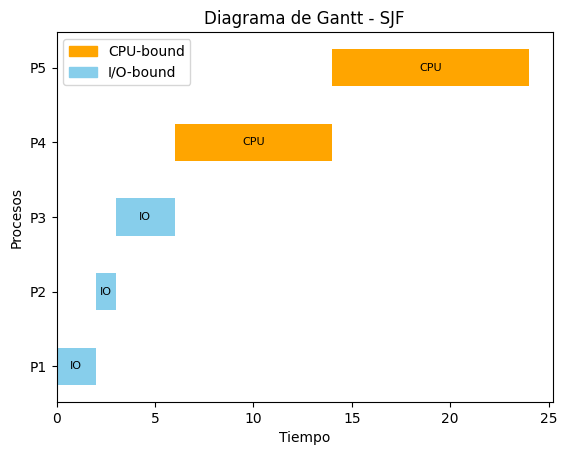

In [ ]:
procesos_exp6 = [
    {"id": "P1", "llegada": 0, "duracion": 2, "tipo": "IO"},
    {"id": "P2", "llegada": 1, "duracion": 1, "tipo": "IO"},
    {"id": "P3", "llegada": 2, "duracion": 3, "tipo": "IO"},
    {"id": "P4", "llegada": 3, "duracion": 8, "tipo": "CPU"},
    {"id": "P5", "llegada": 4, "duracion": 10, "tipo": "CPU"},
]
simular_sjf(procesos_exp6)


### Experimento 4 (Sistema aleatorio de procesos)  


--- M√©tricas Globales (SJF correcto) ---
Promedio Retorno:   48.85
Promedio Espera:    41.70
Promedio Respuesta: 41.70
Throughput:         0.14 procesos/unidad tiempo
Equidad (Fairness): 0.08


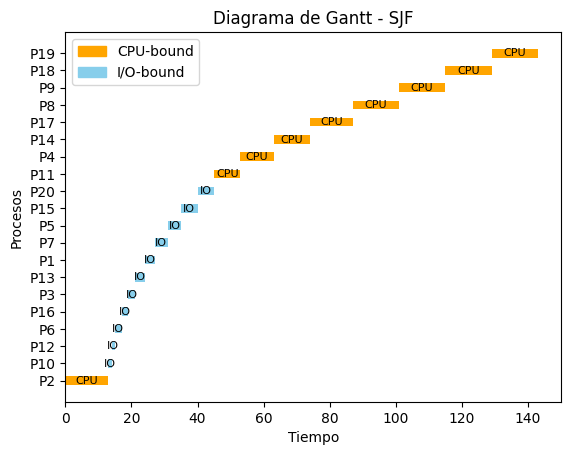

In [ ]:
import random

procesos_random = []
for i in range(20):
    tipo = random.choice(["CPU", "IO"])
    duracion = random.randint(8, 15) if tipo == "CPU" else random.randint(1, 5)
    llegada = random.randint(0, 8)
    procesos_random.append({"id": f"P{i+1}", "llegada": llegada, "duracion": duracion, "tipo": tipo})

simular_sjf(procesos_random)


## Escenario: Alta concurrencia vs Baja concurrencia
En este escenario se busca analizar c√≥mo el algoritmo SJF (Shortest Job First) maneja una cola de procesos que presentan diferentes concurrencias (alta concurrencia y baja concurrencia).  
Todos los procesos llegan a tiempos distintos, pero tienen duraciones y concurrencias distintas.  
Este tipo de escenario son comunes en sistemas operativos modernos y sistemas con recursos limitados.

### Experimento 1 (Alta concurrencia)  


--- M√©tricas Globales (SJF correcto) ---
Promedio Retorno:   40.30
Promedio Espera:    34.05
Promedio Respuesta: 34.05
Throughput:         0.16 procesos/unidad tiempo
Equidad (Fairness): 0.01


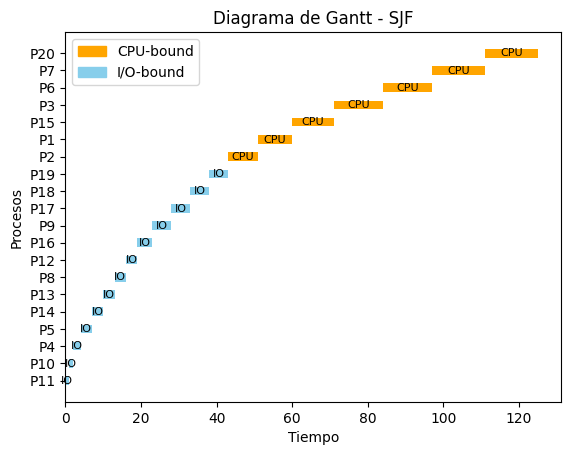

In [ ]:
procesos_exp7 = []
for i in range(20):
    tipo = random.choice(["CPU", "IO"])
    duracion = random.randint(8, 15) if tipo == "CPU" else random.randint(1, 5)
    llegada = random.randint(0, 3)
    procesos_exp7.append({"id": f"P{i+1}", "llegada": llegada, "duracion": duracion, "tipo": tipo})

simular_sjf(procesos_exp7)

### Experimento 2 (Baja concurrencia)  


--- M√©tricas Globales (SJF correcto) ---
Promedio Retorno:   31.60
Promedio Espera:    24.95
Promedio Respuesta: 24.95
Throughput:         0.15 procesos/unidad tiempo
Equidad (Fairness): 0.01


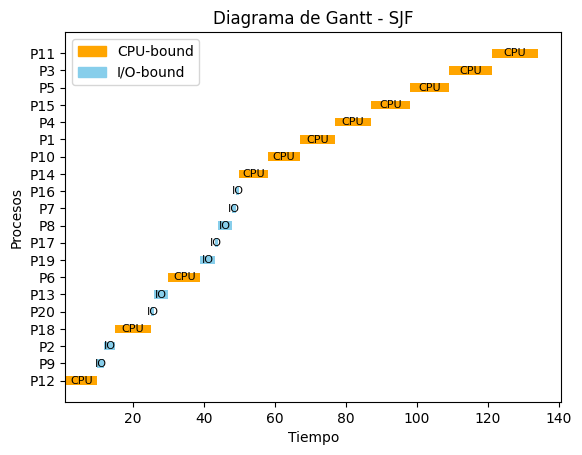

In [ ]:
procesos_exp8 = []
for i in range(20):
    tipo = random.choice(["CPU", "IO"])
    duracion = random.randint(8, 15) if tipo == "CPU" else random.randint(1, 5)
    llegada = random.randint(0, 50)
    procesos_exp8.append({"id": f"P{i+1}", "llegada": llegada, "duracion": duracion, "tipo": tipo})

simular_sjf(procesos_exp8)

#Algoritmo Round Robin



##Algoritmo Round Robin en Python

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

def simular_round_robin(procesosPrueba, quantum):
    procesos = [p.copy() for p in procesosPrueba]
    tiempo_actual = 0
    cola = []
    terminados = []
    timeline = []

    for p in procesos:
        p["restante"] = p["duracion"]

    # Bucle principal
    while True:
        # Agregar procesos que llegan en este instante (sin duplicados)
        for p in procesos:
            if (p["llegada"] == tiempo_actual
                and p["restante"] > 0
                and p["id"] not in [proc["id"] for proc in cola]
                and p["id"] not in [proc["id"] for proc in terminados]):
                cola.append(p)

        if cola:
            actual = cola.pop(0)

            if "inicio" not in actual:
                actual["inicio"] = tiempo_actual
                actual["respuesta"] = tiempo_actual - actual["llegada"]

            # Ejecutar durante el quantum o hasta que termine
            ejecucion = min(quantum, actual["restante"])
            inicio = tiempo_actual
            fin = tiempo_actual + ejecucion

            timeline.append({
                "id": actual["id"],
                "inicio": inicio,
                "duracion": ejecucion,
                "tipo": actual.get("tipo", "")
            })

            tiempo_actual = fin
            actual["restante"] -= ejecucion

            # Agregar los procesos que llegan mientras este se ejecuta
            for p in procesos:
                if (inicio < p["llegada"] <= fin
                    and p["id"] not in [proc["id"] for proc in cola]
                    and p["restante"] > 0
                    and p["id"] not in [proc["id"] for proc in terminados]):
                    cola.append(p)

            if actual["restante"] == 0:
                actual["fin"] = tiempo_actual
                actual["retorno"] = actual["fin"] - actual["llegada"]
                actual["espera"] = actual["retorno"] - actual["duracion"]

                if actual["id"] not in [p["id"] for p in terminados]:
                    terminados.append(actual)
            else:
                cola.append(actual)
        else:
            if any(p["restante"] > 0 for p in procesos):
                tiempo_actual += 1
                continue
            else:
                break

    # --- Verificaci√≥n autom√°tica de duplicados ---
    ids = [p["id"] for p in terminados]
    if len(ids) != len(set(ids)):
        print("‚ö†Ô∏è  Advertencia: Hay procesos repetidos en la lista de terminados")

    # --- Metricas globales ---
    n = len(terminados)
    promedio_retorno = sum(p["retorno"] for p in terminados) / n
    promedio_espera = sum(p["espera"] for p in terminados) / n
    promedio_respuesta = sum(p["respuesta"] for p in terminados) / n
    throughput = n / tiempo_actual if tiempo_actual > 0 else 0
    min_retorno = min(p["retorno"] for p in terminados)
    max_retorno = max(p["retorno"] for p in terminados)
    fairness = min_retorno / max_retorno if max_retorno > 0 else 0

    # --- Tabla de resultados ---
    tiene_tipo = any("tipo" in p for p in procesosPrueba)
    columnas = ["id", "tipo", "llegada", "duracion", "inicio", "fin", "retorno", "espera", "respuesta"] if tiene_tipo \
        else ["id", "llegada", "duracion", "inicio", "fin", "retorno", "espera", "respuesta"]
    df = pd.DataFrame(terminados)[columnas]
    display(df.style.set_caption("Resultados del algoritmo Round Robin"))

    print("\n--- M√©tricas Globales (Round Robin) ---")
    print(f"Quantum:            {quantum}")
    print(f"Promedio Retorno:   {promedio_retorno:.2f}")
    print(f"Promedio Espera:    {promedio_espera:.2f}")
    print(f"Promedio Respuesta: {promedio_respuesta:.2f}")
    print(f"Throughput:         {throughput:.2f} procesos/unidad tiempo")
    print(f"Equidad (Fairness): {fairness:.2f}")

    # --- Diagrama---
    fig, ax = plt.subplots()
    colores_tipo = {"CPU": "orange", "IO": "skyblue"}

    if tiene_tipo:
        tipos_presentes = sorted(set(p["tipo"] for p in procesosPrueba))
        for bloque in timeline:
            color = colores_tipo.get(bloque["tipo"], "lightgray")
            ax.barh(bloque["id"], bloque["duracion"], left=bloque["inicio"], height=0.5, color=color)
        handles = []
        labels = []
        for tipo in tipos_presentes:
            handles.append(plt.Rectangle((0, 0), 1, 1, color=colores_tipo.get(tipo, "lightgray")))
            labels.append("CPU-bound" if tipo == "CPU" else "I/O-bound")
        ax.legend(handles, labels)
    else:
        colores = plt.cm.tab10.colors
        for i, bloque in enumerate(timeline):
            ax.barh(bloque["id"], bloque["duracion"], left=bloque["inicio"], height=0.5, color=colores[i % len(colores)])

    ax.set_xlabel("Tiempo")
    ax.set_ylabel("Procesos")
    ax.set_title(f"Diagrama de Gantt - Round Robin (Quantum={quantum})")
    plt.show()

##Escenario 1: Mezcla de procesos cortos y largos

Se busca observar c√≥mo el algoritmo reparte el tiempo entre procesos de diferente duraci√≥n.
Round Robin no prioriza los cortos, pero les da a todos turnos iguales, mostrando una buena equidad.

###Experimento 1

Escenario A1 (Mezcla cortos/largos) ‚Äî quantum=3



--- M√©tricas Globales (Round Robin) ---
Quantum:            3
Promedio Retorno:   14.60
Promedio Espera:    9.60
Promedio Respuesta: 4.80
Throughput:         0.20 procesos/unidad tiempo
Equidad (Fairness): 0.08


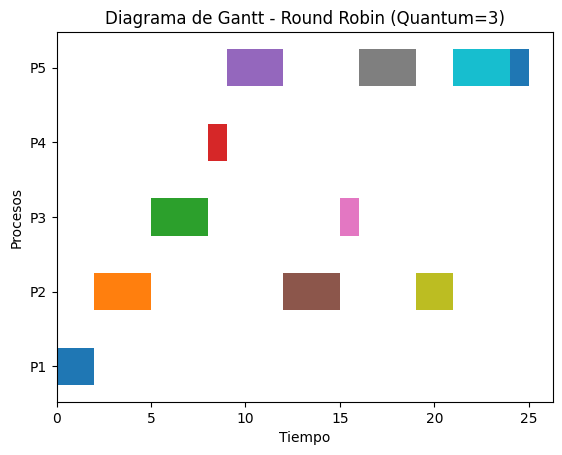

In [ ]:
procesos_exp1 = [
    {"id": "P1", "llegada": 0, "duracion": 2},
    {"id": "P2", "llegada": 0, "duracion": 8},
    {"id": "P3", "llegada": 0, "duracion": 4},
    {"id": "P4", "llegada": 0, "duracion": 1},
    {"id": "P5", "llegada": 0, "duracion": 10},
]
print("Escenario A1 (Mezcla cortos/largos) ‚Äî quantum=3")
simular_round_robin(procesos_exp1, quantum=3)


###Experimento 2

Escenario A2 (Duraciones variadas) ‚Äî quantum=3



--- M√©tricas Globales (Round Robin) ---
Quantum:            3
Promedio Retorno:   62.50
Promedio Espera:    44.67
Promedio Respuesta: 7.50
Throughput:         0.06 procesos/unidad tiempo
Equidad (Fairness): 0.03


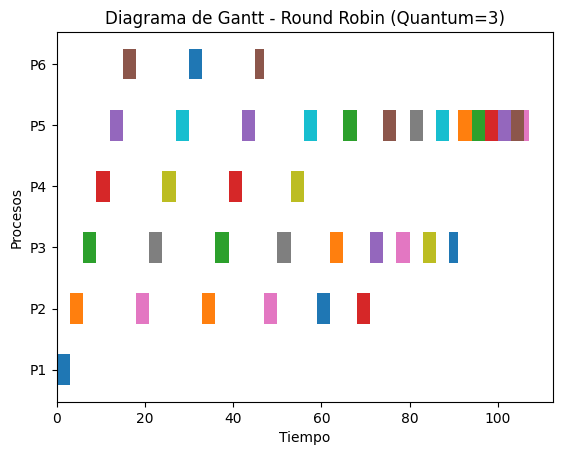

In [ ]:
procesos_exp2 = [
    {"id": "P1", "llegada": 0, "duracion": 3},
    {"id": "P2", "llegada": 0, "duracion": 18},
    {"id": "P3", "llegada": 0, "duracion": 26},
    {"id": "P4", "llegada": 0, "duracion": 12},
    {"id": "P5", "llegada": 0, "duracion": 40},
    {"id": "P6", "llegada": 0, "duracion": 8},
]
print("Escenario A2 (Duraciones variadas) ‚Äî quantum=3")
simular_round_robin(procesos_exp2, quantum=3)


###Experimento 3

Escenario A3 (Muchos procesos variados) ‚Äî quantum=3



--- M√©tricas Globales (Round Robin) ---
Quantum:            3
Promedio Retorno:   253.50
Promedio Espera:    213.00
Promedio Respuesta: 13.50
Throughput:         0.02 procesos/unidad tiempo
Equidad (Fairness): 0.07


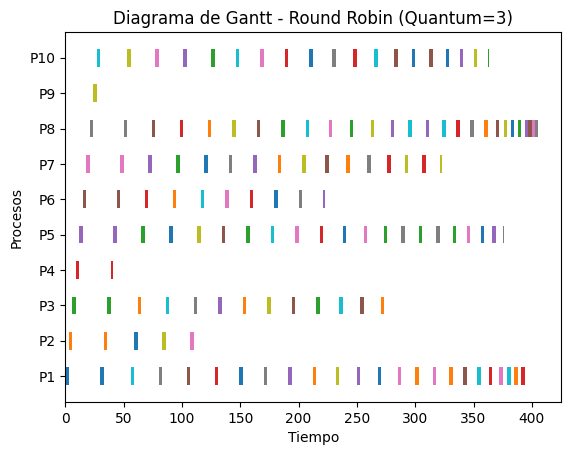

In [ ]:
procesos_exp3 = [
    {"id": "P1", "llegada": 0, "duracion": 72},
    {"id": "P2", "llegada": 0, "duracion": 15},
    {"id": "P3", "llegada": 0, "duracion": 38},
    {"id": "P4", "llegada": 0, "duracion": 5},
    {"id": "P5", "llegada": 0, "duracion": 61},
    {"id": "P6", "llegada": 0, "duracion": 29},
    {"id": "P7", "llegada": 0, "duracion": 47},
    {"id": "P8", "llegada": 0, "duracion": 80},
    {"id": "P9", "llegada": 0, "duracion": 3},
    {"id": "P10","llegada": 0, "duracion": 55},
]
print("Escenario A3 (Muchos procesos variados) ‚Äî quantum=3")
simular_round_robin(procesos_exp3, quantum=3)


##Escenario 2: CPU-bound vs I/O-bound

Aqu√≠ se comparan procesos que usan intensamente la CPU frente a procesos que hacen m√°s I/O (entrada/salida).
Round Robin tiende a equilibrar bien estos casos porque los procesos I/O suelen ceder el CPU antes del quantum completo.


###Experimento 1

Escenario B1 (CPU vs IO, mezcla) ‚Äî quantum=3



--- M√©tricas Globales (Round Robin) ---
Quantum:            3
Promedio Retorno:   18.67
Promedio Espera:    12.67
Promedio Respuesta: 5.33
Throughput:         0.17 procesos/unidad tiempo
Equidad (Fairness): 0.16


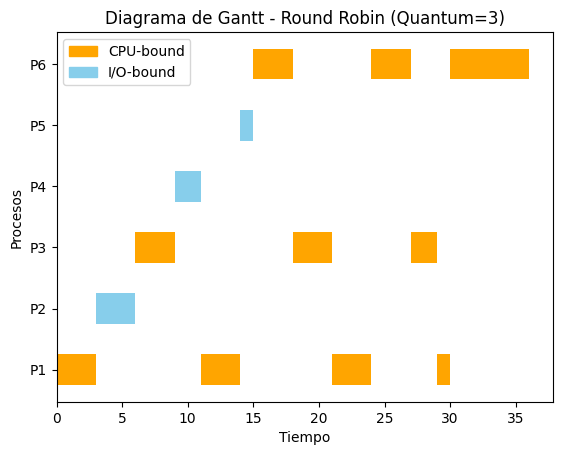

In [ ]:
procesos_exp4 = [
    {"id": "P1", "llegada": 0, "duracion": 10, "tipo": "CPU"},
    {"id": "P2", "llegada": 1, "duracion": 3,  "tipo": "IO"},
    {"id": "P3", "llegada": 2, "duracion": 8,  "tipo": "CPU"},
    {"id": "P4", "llegada": 3, "duracion": 2,  "tipo": "IO"},
    {"id": "P5", "llegada": 4, "duracion": 1,  "tipo": "IO"},
    {"id": "P6", "llegada": 5, "duracion": 12, "tipo": "CPU"},
]
print("Escenario B1 (CPU vs IO, mezcla) ‚Äî quantum=3")
simular_round_robin(procesos_exp4, quantum=3)


###Experimento 2

Escenario B2 (dominancia CPU-bound) ‚Äî quantum=4



--- M√©tricas Globales (Round Robin) ---
Quantum:            4
Promedio Retorno:   37.60
Promedio Espera:    27.80
Promedio Respuesta: 6.00
Throughput:         0.10 procesos/unidad tiempo
Equidad (Fairness): 0.35


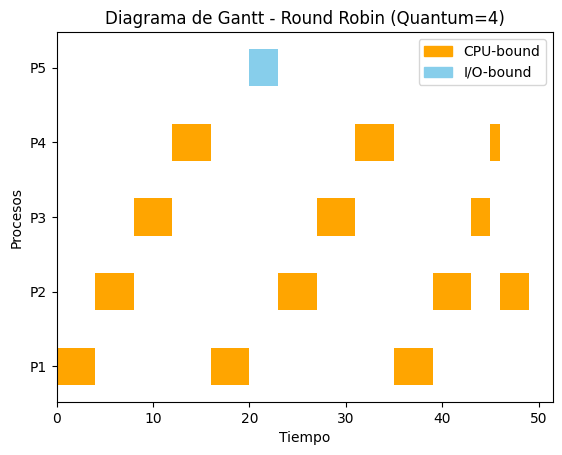

In [ ]:
procesos_exp5 = [
    {"id": "P1", "llegada": 0, "duracion": 12, "tipo": "CPU"},
    {"id": "P2", "llegada": 1, "duracion": 15, "tipo": "CPU"},
    {"id": "P3", "llegada": 3, "duracion": 10, "tipo": "CPU"},
    {"id": "P4", "llegada": 4, "duracion": 9,  "tipo": "CPU"},
    {"id": "P5", "llegada": 6, "duracion": 3,  "tipo": "IO"},
]
print("Escenario B2 (dominancia CPU-bound) ‚Äî quantum=4")
simular_round_robin(procesos_exp5, quantum=4)


###Experimento 3

Escenario B3 (dominancia I/O-bound) ‚Äî quantum=3



--- M√©tricas Globales (Round Robin) ---
Quantum:            3
Promedio Retorno:   9.00
Promedio Espera:    4.20
Promedio Respuesta: 2.00
Throughput:         0.21 procesos/unidad tiempo
Equidad (Fairness): 0.10


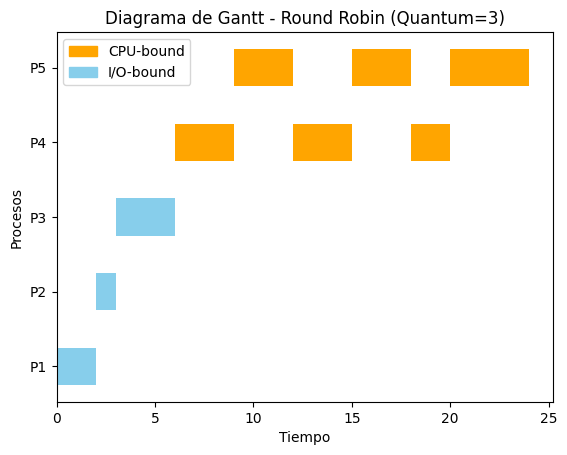

In [ ]:
procesos_exp6 = [
    {"id": "P1", "llegada": 0, "duracion": 2, "tipo": "IO"},
    {"id": "P2", "llegada": 1, "duracion": 1, "tipo": "IO"},
    {"id": "P3", "llegada": 2, "duracion": 3, "tipo": "IO"},
    {"id": "P4", "llegada": 3, "duracion": 8, "tipo": "CPU"},
    {"id": "P5", "llegada": 4, "duracion": 10, "tipo": "CPU"},
]
print("Escenario B3 (dominancia I/O-bound) ‚Äî quantum=3")
simular_round_robin(procesos_exp6, quantum=3)


###Experimento 4

Escenario B4 (aleatorio CPU/IO) ‚Äî quantum=3



--- M√©tricas Globales (Round Robin) ---
Quantum:            3
Promedio Retorno:   102.30
Promedio Espera:    93.95
Promedio Respuesta: 24.10
Throughput:         0.12 procesos/unidad tiempo
Equidad (Fairness): 0.16


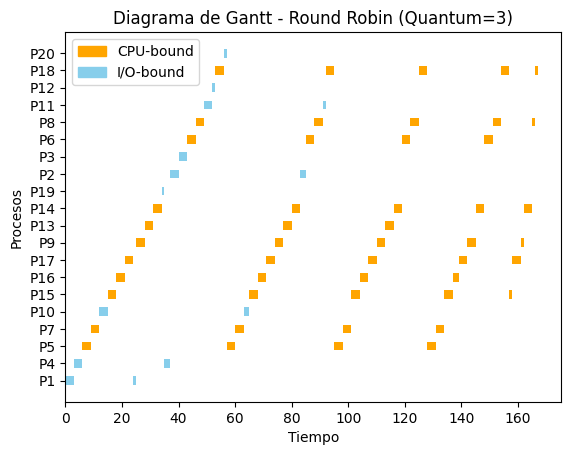

In [ ]:
import random
random.seed(0)  # fija semilla para reproducibilidad

procesos_random = []
for i in range(20):
    tipo = random.choice(["CPU", "IO"])
    duracion = random.randint(8, 15) if tipo == "CPU" else random.randint(1, 5)
    llegada = random.randint(0, 8)
    procesos_random.append({"id": f"P{i+1}", "llegada": llegada, "duracion": duracion, "tipo": tipo})

print("Escenario B4 (aleatorio CPU/IO) ‚Äî quantum=3")
simular_round_robin(procesos_random, quantum=3)


##Escenario 3: Alta concurrencia vs Baja concurrencia

#Alta
Se simulan varios procesos llegando casi juntos.
Round Robin mantiene buena equidad pero aumenta la espera promedio si el quantum es peque√±o.

#Baja
Aqu√≠ cada proceso tiene tiempo de ejecutarse sin mucha competencia.
El resultado se parece al FCFS, pero a√∫n mantiene la estructura por turnos.

###Experimento 1

Escenario C1 (Alta concurrencia) ‚Äî quantum=2



--- M√©tricas Globales (Round Robin) ---
Quantum:            2
Promedio Retorno:   95.30
Promedio Espera:    87.70
Promedio Respuesta: 18.25
Throughput:         0.13 procesos/unidad tiempo
Equidad (Fairness): 0.15


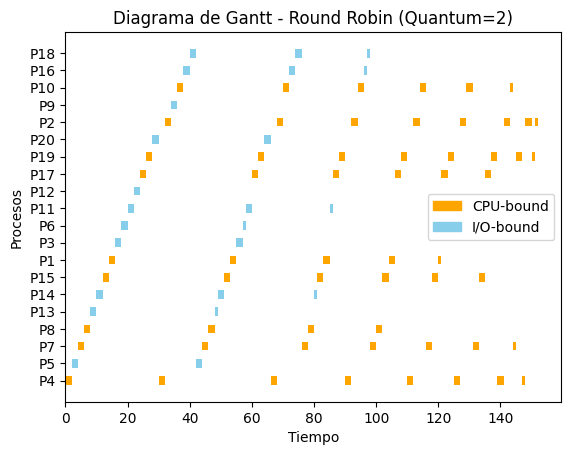

In [ ]:
import random
random.seed(1)

procesos_exp7 = []
for i in range(20):
    tipo = random.choice(["CPU", "IO"])
    duracion = random.randint(8, 15) if tipo == "CPU" else random.randint(1, 5)
    llegada = random.randint(0, 3)
    procesos_exp7.append({"id": f"P{i+1}", "llegada": llegada, "duracion": duracion, "tipo": tipo})

print("Escenario C1 (Alta concurrencia) ‚Äî quantum=2")
simular_round_robin(procesos_exp7, quantum=2)


###Experimento 2

Escenario C2 (Baja concurrencia) ‚Äî quantum=3



--- M√©tricas Globales (Round Robin) ---
Quantum:            3
Promedio Retorno:   66.40
Promedio Espera:    59.10
Promedio Respuesta: 19.80
Throughput:         0.13 procesos/unidad tiempo
Equidad (Fairness): 0.12


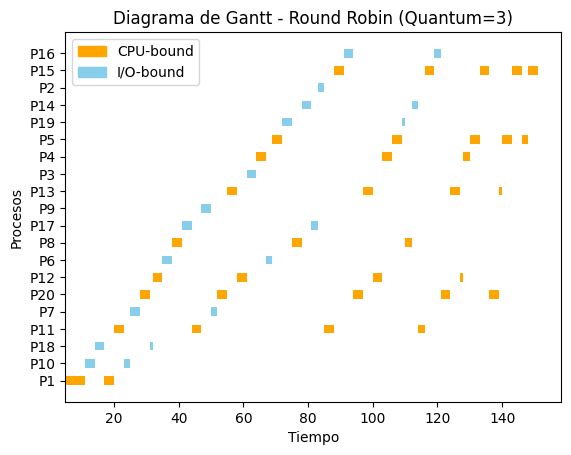

In [ ]:
random.seed(2)

procesos_exp8 = []
for i in range(20):
    tipo = random.choice(["CPU", "IO"])
    duracion = random.randint(8, 15) if tipo == "CPU" else random.randint(1, 5)
    llegada = random.randint(0, 50)
    procesos_exp8.append({"id": f"P{i+1}", "llegada": llegada, "duracion": duracion, "tipo": tipo})

print("Escenario C2 (Baja concurrencia) ‚Äî quantum=3")
simular_round_robin(procesos_exp8, quantum=3)


#Algoritmo de M y H





```
# Esto tiene formato de c√≥digo
```

Algoritmo de Prioridad Estatica y Dinamica
*texto en cursiva*

> Agregar bloque entrecomillado



Algoritmo de Prioridad Estatica y Dinamica # Secci√≥n nueva

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import sys
import copy
import numpy as np

# --- 1. CLASE DEL PROCESO ---
class Proceso:
    def __init__(self, pid, llegada, rafaga, prioridad_estatica):
        self.pid = pid
        self.llegada = llegada
        self.rafaga = rafaga
        self.prioridad_estatica = prioridad_estatica
        self.prioridad_dinamica = prioridad_estatica
        self.tiempo_restante = rafaga
        self.tiempo_inicio = -1
        self.tiempo_finalizacion = 0
        self.tiempo_espera = 0

    def __repr__(self):
        return f"[PID: {self.pid}, Prioridad: {self.prioridad_dinamica}]"

# --- 2. L√ìGICA DE SELECCI√ìN ---
def seleccionar_proceso_con_mayor_prioridad(cola_listos, tipo_algoritmo):
    if not cola_listos:
        return None
    proceso_elegido = cola_listos[0]
    if tipo_algoritmo == 'estatica':
        for p in cola_listos:
            if p.prioridad_estatica < proceso_elegido.prioridad_estatica:
                proceso_elegido = p
    elif tipo_algoritmo == 'dinamica':
        for p in cola_listos:
            if p.prioridad_dinamica < proceso_elegido.prioridad_dinamica:
                proceso_elegido = p
    return proceso_elegido

# --- 3. L√ìGICA DE ENVEJECIMIENTO ---
def envejecer_procesos_en_espera(cola_listos, factor_envejecimiento=1):
    for p in cola_listos:
        p.prioridad_dinamica = max(0, p.prioridad_dinamica - factor_envejecimiento)

# --- 4. SIMULADOR PRINCIPAL ---
def simular_planificacion(lista_procesos_inicial, tipo_algoritmo):
    procesos = copy.deepcopy(lista_procesos_inicial)
    tiempo_actual = 0
    cola_listos = []
    procesos_terminados = []
    proceso_en_ejecucion = None
    procesos_por_llegar = sorted(procesos, key=lambda p: p.llegada)

    while procesos_por_llegar or cola_listos or proceso_en_ejecucion:

        # 1. Llegada de nuevos procesos
        while procesos_por_llegar and procesos_por_llegar[0].llegada <= tiempo_actual:
            cola_listos.append(procesos_por_llegar.pop(0))

        # 2. Selecci√≥n del mejor candidato DE LA COLA
        proceso_elegido_de_cola = seleccionar_proceso_con_mayor_prioridad(cola_listos, tipo_algoritmo)

        # 3. L√≥gica de Decisi√≥n (CPU Scheduler)
        if proceso_en_ejecucion:
            if proceso_elegido_de_cola:
                mejor_en_cola = False
                if tipo_algoritmo == 'estatica':
                    if proceso_elegido_de_cola.prioridad_estatica < proceso_en_ejecucion.prioridad_estatica:
                        mejor_en_cola = True
                elif tipo_algoritmo == 'dinamica':
                     if proceso_elegido_de_cola.prioridad_dinamica < proceso_en_ejecucion.prioridad_dinamica:
                        mejor_en_cola = True

                if mejor_en_cola:
                    # --- ¬°PREEMPTION (APROPIACI√ìN)! ---
                    cola_listos.append(proceso_en_ejecucion)
                    proceso_en_ejecucion = proceso_elegido_de_cola
                    cola_listos.remove(proceso_elegido_de_cola)
                    if proceso_en_ejecucion.tiempo_inicio == -1:
                        proceso_en_ejecucion.tiempo_inicio = tiempo_actual

        elif proceso_elegido_de_cola:
            # --- ASIGNACI√ìN NORMAL ---
            proceso_en_ejecucion = proceso_elegido_de_cola
            cola_listos.remove(proceso_elegido_de_cola)
            if proceso_en_ejecucion.tiempo_inicio == -1:
                proceso_en_ejecucion.tiempo_inicio = tiempo_actual

        # 6. Ejecutar el tick del proceso en CPU
        if proceso_en_ejecucion:
            proceso_en_ejecucion.tiempo_restante -= 1

            # 7. Comprobar si el proceso termin√≥
            if proceso_en_ejecucion.tiempo_restante == 0:
                proceso_en_ejecucion.tiempo_finalizacion = tiempo_actual + 1
                procesos_terminados.append(proceso_en_ejecucion)
                proceso_en_ejecucion = None # El CPU queda libre

        # --- BLOQUES MOVIDOS AL FINAL ---

        # 4. Actualizar Tiempos de Espera (NUEVA UBICACI√ìN)
        for p in cola_listos:
            p.tiempo_espera += 1

        # 5. Envejecimiento (NUEVA UBICACI√ìN)
        if tipo_algoritmo == 'dinamica' and cola_listos:
            envejecer_procesos_en_espera(cola_listos)

        # --- FIN DE BLOQUES MOVIDOS ---

        # 8. Avanzar el reloj
        tiempo_actual += 1
        if tiempo_actual > 1000:
            print("Simulaci√≥n abortada (l√≠mite de 1000 ticks)")
            break

    return procesos_terminados

# --- 5. FUNCI√ìN AUXILIAR PARA CREAR PROCESOS ---
def crear_lista_procesos_desde_dict(lista_dicts):
    lista_procesos = []
    for p_dict in lista_dicts:
        lista_procesos.append(
            Proceso(
                pid=p_dict["id"],
                llegada=p_dict["llegada"],
                rafaga=p_dict["duracion"],
                prioridad_estatica=p_dict["prioridad"]
            )
        )
    return lista_procesos

# --- 6. GRAFICAR RESULTADOS ---
def generar_grafico_escenario(titulo_escenario, procesos_est, procesos_din):
    import matplotlib.patches as mpatches

    # --- Preparar datos ---
    procesos_est.sort(key=lambda p: p.pid)
    procesos_din.sort(key=lambda p: p.pid)

    pids = [p.pid for p in procesos_est]
    espera_est = [p.tiempo_espera for p in procesos_est]
    espera_din = [p.tiempo_espera for p in procesos_din]
    retorno_est = [p.tiempo_finalizacion - p.llegada for p in procesos_est]
    retorno_din = [p.tiempo_finalizacion - p.llegada for p in procesos_din]

    n = len(pids)
    indices = np.arange(n)
    ancho_barra = 0.35

    # --- Paleta de colores (tipo Round Robin) ---
    colores = plt.cm.tab10.colors
    color_est = colores[0]  # Azul suave
    color_din = colores[1]  # Naranja suave

    # --- Crear figura con estilo ---
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    fig.suptitle(titulo_escenario, fontsize=14, fontweight='bold', color="#333333")
    plt.subplots_adjust(hspace=0.3)

    # --- Estilo global ---
    for ax in (ax1, ax2):
        ax.set_facecolor("#f9f9f9")
        ax.grid(axis='y', linestyle='--', alpha=0.4)
        ax.tick_params(axis='x', labelrotation=0)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    # --- Subplot 1: Tiempo de Espera ---
    ax1.bar(indices - ancho_barra/2, espera_est, ancho_barra,
            label='Est√°tica', color=color_est, edgecolor='black', alpha=0.9)
    ax1.bar(indices + ancho_barra/2, espera_din, ancho_barra,
            label='Din√°mica', color=color_din, edgecolor='black', alpha=0.9)

    for i, val in enumerate(espera_est):
        ax1.text(indices[i] - ancho_barra/2, val + 0.1, str(val),
                 ha='center', va='bottom', fontsize=8, color="#333333", fontweight='bold')
    for i, val in enumerate(espera_din):
        ax1.text(indices[i] + ancho_barra/2, val + 0.1, str(val),
                 ha='center', va='bottom', fontsize=8, color="#333333", fontweight='bold')

    ax1.set_title(" Tiempo de Espera por Proceso", fontsize=12, fontweight="bold")
    ax1.set_ylabel("Ticks de Espera", fontsize=10)
    ax1.set_xticks(indices)
    ax1.set_xticklabels(pids, fontsize=9)
    ax1.legend(frameon=False)

    # --- Subplot 2: Tiempo de Retorno ---
    ax2.bar(indices - ancho_barra/2, retorno_est, ancho_barra,
            label='Est√°tica', color=color_est, edgecolor='black', alpha=0.9)
    ax2.bar(indices + ancho_barra/2, retorno_din, ancho_barra,
            label='Din√°mica', color=color_din, edgecolor='black', alpha=0.9)

    for i, val in enumerate(retorno_est):
        ax2.text(indices[i] - ancho_barra/2, val + 0.1, str(val),
                 ha='center', va='bottom', fontsize=8, color="#333333", fontweight='bold')
    for i, val in enumerate(retorno_din):
        ax2.text(indices[i] + ancho_barra/2, val + 0.1, str(val),
                 ha='center', va='bottom', fontsize=8, color="#333333", fontweight='bold')

    ax2.set_title(" Tiempo de Retorno (Turnaround)", fontsize=12, fontweight="bold")
    ax2.set_ylabel("Ticks Totales", fontsize=10)
    ax2.set_xticks(indices)
    ax2.set_xticklabels(pids, fontsize=9)
    ax2.legend(frameon=False)

    # --- Leyenda superior ---
    patches = [
        mpatches.Patch(color=color_est, label="Est√°tica"),
        mpatches.Patch(color=color_din, label="Din√°mica")
    ]
    fig.legend(handles=patches, loc='upper right', frameon=False, fontsize=9)

    plt.tight_layout()
    plt.show()


# --- 7. MOSTRAR TABLA ---
def mostrar_tabla_resultados(procesos, titulo):
    data = {
        "PID": [p.pid for p in procesos],
        "Llegada": [p.llegada for p in procesos],
        "Duraci√≥n": [p.rafaga for p in procesos],
        "Prioridad Est√°tica": [p.prioridad_estatica for p in procesos],
        "Inicio": [p.tiempo_inicio for p in procesos],
        "Finalizaci√≥n": [p.tiempo_finalizacion for p in procesos],
        "Espera": [p.tiempo_espera for p in procesos],
        "Retorno": [p.tiempo_finalizacion - p.llegada for p in procesos]
    }
    df = pd.DataFrame(data)
    print(f"\n {titulo}")
    display(df)
    return df

print("Simulador de planificaci√≥n cargado correctamente.")




Simulador de planificaci√≥n cargado correctamente.


## Escenario: Conflicto (Prioridad vs. Duraci√≥n)
Ver qu√© pasa cuando la prioridad de un proceso es inversa a su duraci√≥n (procesos largos tienen alta prioridad y procesos cortos tienen baja prioridad).

### Experimento 1 (Conflicto Extremo)  

Un proceso muy largo (P5) tiene la mejor prioridad, y uno muy corto (P4) tiene la peor. Todos llegan al mismo tiempo. Qu√© observar: La Est√°tica ser√° muy ineficiente (P4 espera una eternidad). La Din√°mica deber√≠a "salvar" a P4 haciendo que su prioridad aumente r√°pidamente.

/tmp/ipython-input-1439563788.py:218: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1439563788.py:218: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


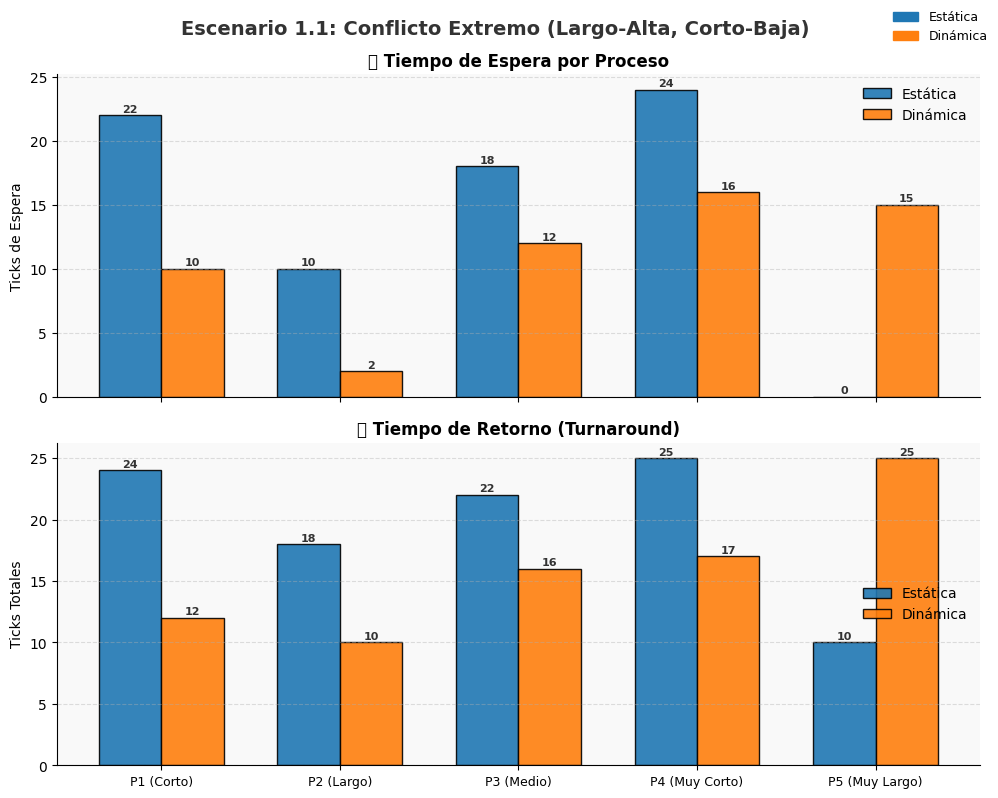


üìã Resultados: Prioridad Est√°tica (1.1)


PID  Llegada  Duraci√≥n  Prioridad Est√°tica  Inicio  \
0      P1 (Corto)        0         2                   4      22   
1      P2 (Largo)        0         8                   2      10   
2      P3 (Medio)        0         4                   3      18   
3  P4 (Muy Corto)        0         1                   5      24   
4  P5 (Muy Largo)        0        10                   1       0   

   Finalizaci√≥n  Espera  Retorno  
0            24      22       24  
1            18      10       18  
2            22      18       22  
3            25      24       25  
4            10       0       10


üìã Resultados: Prioridad Din√°mica (1.1)


PID  Llegada  Duraci√≥n  Prioridad Est√°tica  Inicio  \
0      P1 (Corto)        0         2                   4      10   
1      P2 (Largo)        0         8                   2       2   
2      P3 (Medio)        0         4                   3      12   
3  P4 (Muy Corto)        0         1                   5      16   
4  P5 (Muy Largo)        0        10                   1       0   

   Finalizaci√≥n  Espera  Retorno  
0            12      10       12  
1            10       2       10  
2            16      12       16  
3            17      16       17  
4            25      15       25

PID  Llegada  Duraci√≥n  Prioridad Est√°tica  Inicio  \
0      P1 (Corto)        0         2                   4      10   
1      P2 (Largo)        0         8                   2       2   
2      P3 (Medio)        0         4                   3      12   
3  P4 (Muy Corto)        0         1                   5      16   
4  P5 (Muy Largo)        0        10                   1       0   

   Finalizaci√≥n  Espera  Retorno  
0            12      10       12  
1            10       2       10  
2            16      12       16  
3            17      16       17  
4            25      15       25

In [ ]:
# --- 1.1 Definici√≥n del Experimento ---
titulo_1_1 = "Escenario 1.1: Conflicto Extremo (Largo-Alta, Corto-Baja)"
procesos_1_1 = [
    {"id": "P1 (Corto)", "llegada": 0, "duracion": 2, "prioridad": 4},
    {"id": "P2 (Largo)", "llegada": 0, "duracion": 8, "prioridad": 2},
    {"id": "P3 (Medio)", "llegada": 0, "duracion": 4, "prioridad": 3},
    {"id": "P4 (Muy Corto)","llegada": 0, "duracion": 1, "prioridad": 5}, # <-- Peor prioridad
    {"id": "P5 (Muy Largo)","llegada": 0, "duracion": 10,"prioridad": 1}, # <-- Mejor prioridad
]

# --- Simulaci√≥n ---
lista_obj_1_est = crear_lista_procesos_desde_dict(procesos_1_1)
lista_obj_1_din = crear_lista_procesos_desde_dict(procesos_1_1)

res_est_1 = simular_planificacion(lista_obj_1_est, 'estatica')
res_din_1 = simular_planificacion(lista_obj_1_din, 'dinamica')

# --- Resultados ---
generar_grafico_escenario(titulo_1_1, res_est_1, res_din_1)
mostrar_tabla_resultados(res_est_1, "Resultados: Prioridad Est√°tica (1.1)")
mostrar_tabla_resultados(res_din_1, "Resultados: Prioridad Din√°mica (1.1)")

### Experimento 2 (Armon√≠a (Control))  

La prioridad est√° alineada con la duraci√≥n. Qu√© observar: Ambos algoritmos, Est√°tica y Din√°mica, deber√≠an comportarse de manera muy similar y ser muy eficientes. El envejecimiento (aging) de la din√°mica apenas actuar√°.

/tmp/ipython-input-1439563788.py:218: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1439563788.py:218: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


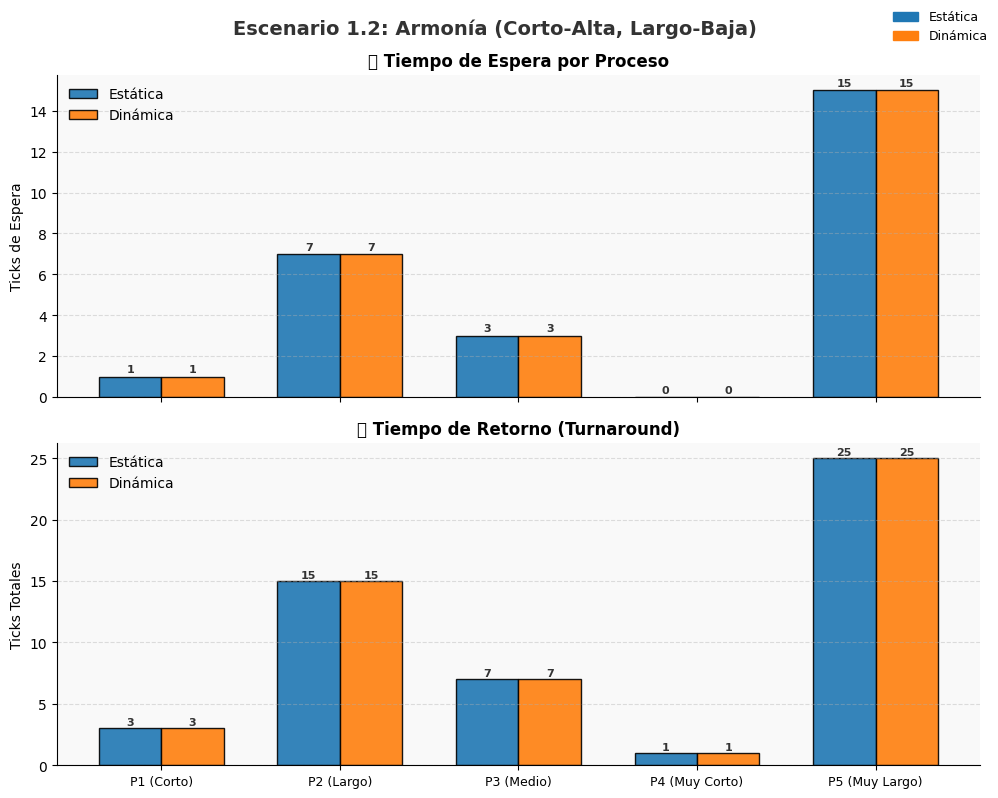


üìã Resultados: Prioridad Est√°tica (1.2)


PID  Llegada  Duraci√≥n  Prioridad Est√°tica  Inicio  \
0      P1 (Corto)        0         2                   2       1   
1      P2 (Largo)        0         8                   4       7   
2      P3 (Medio)        0         4                   3       3   
3  P4 (Muy Corto)        0         1                   1       0   
4  P5 (Muy Largo)        0        10                   5      15   

   Finalizaci√≥n  Espera  Retorno  
0             3       1        3  
1            15       7       15  
2             7       3        7  
3             1       0        1  
4            25      15       25


üìã Resultados: Prioridad Din√°mica (1.2)


PID  Llegada  Duraci√≥n  Prioridad Est√°tica  Inicio  \
0      P1 (Corto)        0         2                   2       1   
1      P2 (Largo)        0         8                   4       7   
2      P3 (Medio)        0         4                   3       3   
3  P4 (Muy Corto)        0         1                   1       0   
4  P5 (Muy Largo)        0        10                   5      15   

   Finalizaci√≥n  Espera  Retorno  
0             3       1        3  
1            15       7       15  
2             7       3        7  
3             1       0        1  
4            25      15       25

PID  Llegada  Duraci√≥n  Prioridad Est√°tica  Inicio  \
0      P1 (Corto)        0         2                   2       1   
1      P2 (Largo)        0         8                   4       7   
2      P3 (Medio)        0         4                   3       3   
3  P4 (Muy Corto)        0         1                   1       0   
4  P5 (Muy Largo)        0        10                   5      15   

   Finalizaci√≥n  Espera  Retorno  
0             3       1        3  
1            15       7       15  
2             7       3        7  
3             1       0        1  
4            25      15       25

In [ ]:
# --- 1.2 Definici√≥n del Experimento ---
titulo_1_2 = "Escenario 1.2: Armon√≠a (Corto-Alta, Largo-Baja)"
procesos_1_2 = [
    {"id": "P1 (Corto)", "llegada": 0, "duracion": 2, "prioridad": 2},
    {"id": "P2 (Largo)", "llegada": 0, "duracion": 8, "prioridad": 4},
    {"id": "P3 (Medio)", "llegada": 0, "duracion": 4, "prioridad": 3},
    {"id": "P4 (Muy Corto)","llegada": 0, "duracion": 1, "prioridad": 1}, # <-- Mejor prioridad
    {"id": "P5 (Muy Largo)","llegada": 0, "duracion": 10,"prioridad": 5}, # <-- Peor prioridad
]

# --- Simulaci√≥n ---
lista_obj_2_est = crear_lista_procesos_desde_dict(procesos_1_2)
lista_obj_2_din = crear_lista_procesos_desde_dict(procesos_1_2)

res_est_2 = simular_planificacion(lista_obj_2_est, 'estatica')
res_din_2 = simular_planificacion(lista_obj_2_din, 'dinamica')

# --- Resultados ---
generar_grafico_escenario(titulo_1_2, res_est_2, res_din_2)
mostrar_tabla_resultados(res_est_2, "Resultados: Prioridad Est√°tica (1.2)")
mostrar_tabla_resultados(res_din_2, "Resultados: Prioridad Din√°mica (1.2)")

### Experimento 3 (Conflicto Mixto)  

Un escenario m√°s realista. Las prioridades y duraciones est√°n mezcladas aleatoriamente. Qu√© observar: La Est√°tica simplemente seguir√° el orden 1, 2, 3, 4, 5. La Din√°mica mostrar√° un reordenamiento interesante; P3 (corto, baja prioridad) probablemente "envejecer√°" y se ejecutar√° antes que P4 (largo, prioridad media).

/tmp/ipython-input-1439563788.py:218: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1439563788.py:218: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


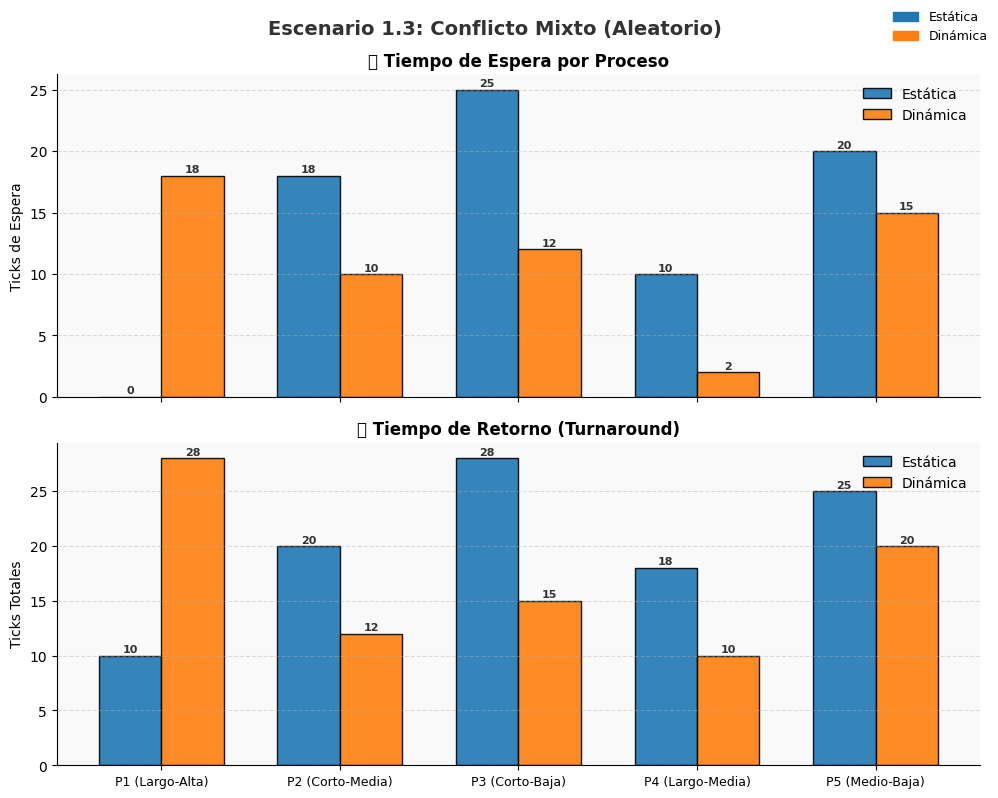


üìã Resultados: Prioridad Est√°tica (1.3)


PID  Llegada  Duraci√≥n  Prioridad Est√°tica  Inicio  \
0   P1 (Largo-Alta)        0        10                   1       0   
1  P2 (Corto-Media)        0         2                   3      18   
2   P3 (Corto-Baja)        0         3                   5      25   
3  P4 (Largo-Media)        0         8                   2      10   
4   P5 (Medio-Baja)        0         5                   4      20   

   Finalizaci√≥n  Espera  Retorno  
0            10       0       10  
1            20      18       20  
2            28      25       28  
3            18      10       18  
4            25      20       25


üìã Resultados: Prioridad Din√°mica (1.3)


PID  Llegada  Duraci√≥n  Prioridad Est√°tica  Inicio  \
0   P1 (Largo-Alta)        0        10                   1       0   
1  P2 (Corto-Media)        0         2                   3      10   
2   P3 (Corto-Baja)        0         3                   5      12   
3  P4 (Largo-Media)        0         8                   2       2   
4   P5 (Medio-Baja)        0         5                   4      15   

   Finalizaci√≥n  Espera  Retorno  
0            28      18       28  
1            12      10       12  
2            15      12       15  
3            10       2       10  
4            20      15       20

PID  Llegada  Duraci√≥n  Prioridad Est√°tica  Inicio  \
0   P1 (Largo-Alta)        0        10                   1       0   
1  P2 (Corto-Media)        0         2                   3      10   
2   P3 (Corto-Baja)        0         3                   5      12   
3  P4 (Largo-Media)        0         8                   2       2   
4   P5 (Medio-Baja)        0         5                   4      15   

   Finalizaci√≥n  Espera  Retorno  
0            28      18       28  
1            12      10       12  
2            15      12       15  
3            10       2       10  
4            20      15       20

In [ ]:
# --- 1.3 Definici√≥n del Experimento ---
titulo_1_3 = "Escenario 1.3: Conflicto Mixto (Aleatorio)"
procesos_1_3 = [
    {"id": "P1 (Largo-Alta)", "llegada": 0, "duracion": 10, "prioridad": 1},
    {"id": "P2 (Corto-Media)","llegada": 0, "duracion": 2,  "prioridad": 3},
    {"id": "P3 (Corto-Baja)", "llegada": 0, "duracion": 3,  "prioridad": 5},
    {"id": "P4 (Largo-Media)", "llegada": 0, "duracion": 8,  "prioridad": 2},
    {"id": "P5 (Medio-Baja)", "llegada": 0, "duracion": 5,  "prioridad": 4},
]

# --- Simulaci√≥n ---
lista_obj_3_est = crear_lista_procesos_desde_dict(procesos_1_3)
lista_obj_3_din = crear_lista_procesos_desde_dict(procesos_1_3)

res_est_3 = simular_planificacion(lista_obj_3_est, 'estatica')
res_din_3 = simular_planificacion(lista_obj_3_din, 'dinamica')

# --- Resultados ---
generar_grafico_escenario(titulo_1_3, res_est_3, res_din_3)
mostrar_tabla_resultados(res_est_3, "Resultados: Prioridad Est√°tica (1.3)")
mostrar_tabla_resultados(res_din_3, "Resultados: Prioridad Din√°mica (1.3)")

## Escenario: CPU-bound vs. I/O-bound
Probar el caso de uso cl√°sico: un proceso largo de baja prioridad (CPU-bound) debe ser interrumpido por procesos cortos de alta prioridad (I/O-bound).

### Experimento 1 ("Bombardeo" de I/O (Alta Frecuencia))  

¬øQu√© pasa si el sistema es bombardeado con muchos procesos de I/O muy seguidos?

Qu√© observar:

Est√°tica (Azul): Seguir√° funcionando bien. CPU-Largo simplemente correr√° en los peque√±os huecos que dejen los procesos de I/O.

Din√°mica (Naranja): Aqu√≠ la din√°mica puede fallar. CPU-Largo (Pri 5) pasar√° tanto tiempo esperando que "envejecer√°" muy r√°pido y su prioridad subir√° a 0. Esto causar√° que compita con los procesos de I/O, lo cual es indeseable y arruina el prop√≥sito del sistema.

/tmp/ipython-input-4078093743.py:425: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4078093743.py:425: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


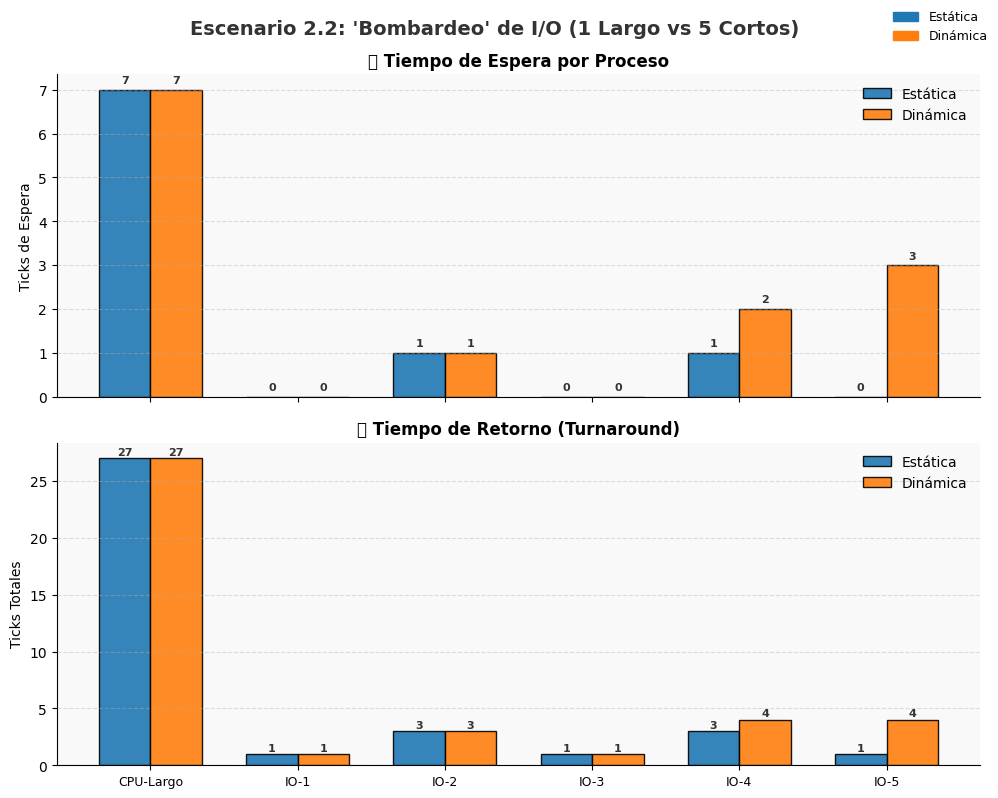


üìã Resultados: Prioridad Est√°tica (2.2)


PID  Llegada  Duraci√≥n  Prioridad Est√°tica  Inicio  Finalizaci√≥n  \
0  CPU-Largo        0        20                   5       0            27   
1       IO-1        2         1                   1       2             3   
2       IO-2        3         2                   2       3             6   
3       IO-3        4         1                   1       4             5   
4       IO-4        6         2                   2       6             9   
5       IO-5        7         1                   1       7             8   

   Espera  Retorno  
0       7       27  
1       0        1  
2       1        3  
3       0        1  
4       1        3  
5       0        1


üìã Resultados: Prioridad Din√°mica (2.2)


PID  Llegada  Duraci√≥n  Prioridad Est√°tica  Inicio  Finalizaci√≥n  \
0  CPU-Largo        0        20                   5       0            27   
1       IO-1        2         1                   1       2             3   
2       IO-2        3         2                   2       3             6   
3       IO-3        4         1                   1       4             5   
4       IO-4        6         2                   2       8            10   
5       IO-5        7         1                   1      10            11   

   Espera  Retorno  
0       7       27  
1       0        1  
2       1        3  
3       0        1  
4       2        4  
5       3        4

PID  Llegada  Duraci√≥n  Prioridad Est√°tica  Inicio  Finalizaci√≥n  \
0  CPU-Largo        0        20                   5       0            27   
1       IO-1        2         1                   1       2             3   
2       IO-2        3         2                   2       3             6   
3       IO-3        4         1                   1       4             5   
4       IO-4        6         2                   2       8            10   
5       IO-5        7         1                   1      10            11   

   Espera  Retorno  
0       7       27  
1       0        1  
2       1        3  
3       0        1  
4       2        4  
5       3        4

In [ ]:
# --- 2.2 Definici√≥n del Experimento ---
titulo_2_2 = "Escenario 2.2: 'Bombardeo' de I/O (1 Largo vs 5 Cortos)"
procesos_2_2 = [
    {"id": "CPU-Largo", "llegada": 0, "duracion": 20, "prioridad": 5},

    # Flujo de I/O muy denso
    {"id": "IO-1",      "llegada": 2, "duracion": 1,  "prioridad": 1},
    {"id": "IO-2",      "llegada": 3, "duracion": 2,  "prioridad": 2},
    {"id": "IO-3",      "llegada": 4, "duracion": 1,  "prioridad": 1},
    {"id": "IO-4",      "llegada": 6, "duracion": 2,  "prioridad": 2},
    {"id": "IO-5",      "llegada": 7, "duracion": 1,  "prioridad": 1},
]

# --- Simulaci√≥n ---
lista_obj_est = crear_lista_procesos_desde_dict(procesos_2_2)
lista_obj_din = crear_lista_procesos_desde_dict(procesos_2_2)

res_est = simular_planificacion(lista_obj_est, 'estatica')
res_din = simular_planificacion(lista_obj_din, 'dinamica')

# --- Resultados ---
generar_grafico_escenario(titulo_2_2, res_est, res_din)
mostrar_tabla_resultados(res_est, "Resultados: Prioridad Est√°tica (2.2)")
mostrar_tabla_resultados(res_din, "Resultados: Prioridad Din√°mica (2.2)")

### Experimento 2 (Brecha de Prioridad Peque√±a)  

¬øQu√© pasa si los procesos de I/O son solo un poco m√°s importantes que el de CPU?.

Qu√© observar:

Est√°tica (Azul): Funcionar√° perfectamente. 2 sigue siendo mejor que 3.

Din√°mica (Naranja): El sistema colapsar√°. CPU-Largo (Pri 3) solo necesita "envejecer" 1 tick (mientras IO-1 corre) para pasar a Prioridad 2. Empezar√° a empatar y competir con los procesos de I/O, haciendo que esperen mucho.

/tmp/ipython-input-1439563788.py:218: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1439563788.py:218: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


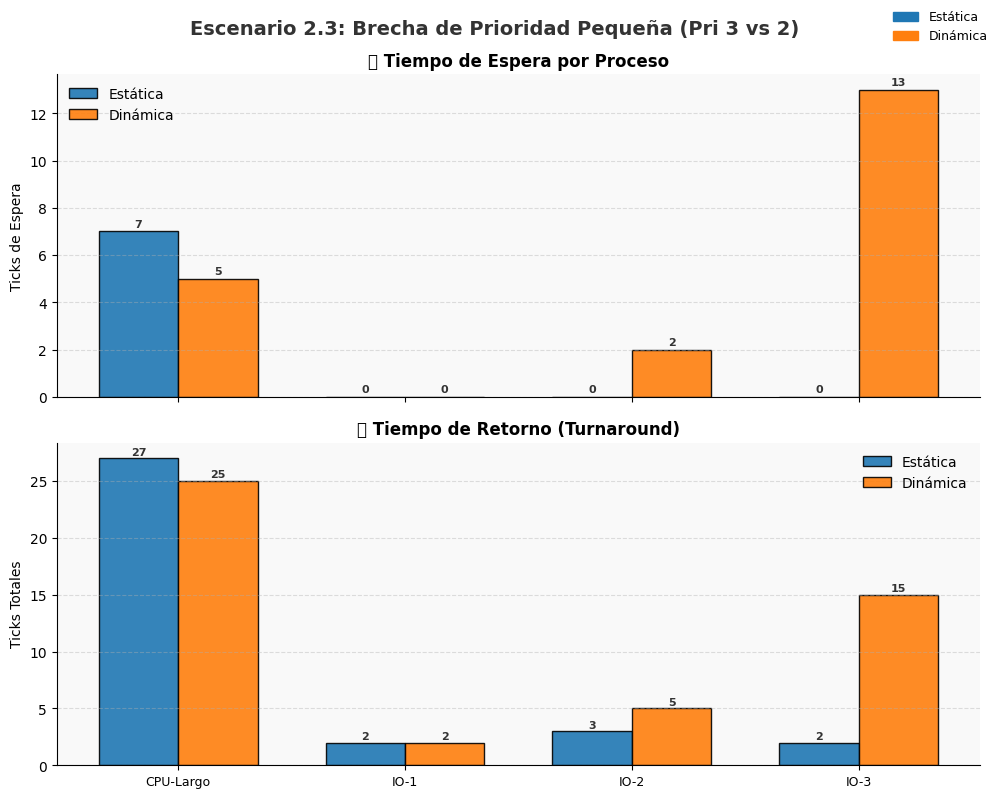


üìã Resultados: Prioridad Est√°tica (2.3)


PID  Llegada  Duraci√≥n  Prioridad Est√°tica  Inicio  Finalizaci√≥n  \
0  CPU-Largo        0        20                   3       0            27   
1       IO-1        3         2                   2       3             5   
2       IO-2        7         3                   2       7            10   
3       IO-3       12         2                   1      12            14   

   Espera  Retorno  
0       7       27  
1       0        2  
2       0        3  
3       0        2


üìã Resultados: Prioridad Din√°mica (2.3)


PID  Llegada  Duraci√≥n  Prioridad Est√°tica  Inicio  Finalizaci√≥n  \
0  CPU-Largo        0        20                   3       0            25   
1       IO-1        3         2                   2       3             5   
2       IO-2        7         3                   2       9            12   
3       IO-3       12         2                   1      25            27   

   Espera  Retorno  
0       5       25  
1       0        2  
2       2        5  
3      13       15

PID  Llegada  Duraci√≥n  Prioridad Est√°tica  Inicio  Finalizaci√≥n  \
0  CPU-Largo        0        20                   3       0            25   
1       IO-1        3         2                   2       3             5   
2       IO-2        7         3                   2       9            12   
3       IO-3       12         2                   1      25            27   

   Espera  Retorno  
0       5       25  
1       0        2  
2       2        5  
3      13       15

In [ ]:
# --- 2.3 Definici√≥n del Experimento ---
titulo_2_3 = "Escenario 2.3: Brecha de Prioridad Peque√±a (Pri 3 vs 2)"
procesos_2_3 = [
    {"id": "CPU-Largo", "llegada": 0, "duracion": 20, "prioridad": 3}, # <-- Prioridad media

    {"id": "IO-1",      "llegada": 3, "duracion": 2,  "prioridad": 2}, # <-- Solo 1 nivel mejor
    {"id": "IO-2",      "llegada": 7, "duracion": 3,  "prioridad": 2},
    {"id": "IO-3",      "llegada": 12,"duracion": 2,  "prioridad": 1}, # <-- Este sigue siendo urgente
]

# --- Simulaci√≥n ---
lista_obj_est = crear_lista_procesos_desde_dict(procesos_2_3)
lista_obj_din = crear_lista_procesos_desde_dict(procesos_2_3)

res_est = simular_planificacion(lista_obj_est, 'estatica')
res_din = simular_planificacion(lista_obj_din, 'dinamica')

# --- Resultados ---
generar_grafico_escenario(titulo_2_3, res_est, res_din)
mostrar_tabla_resultados(res_est, "Resultados: Prioridad Est√°tica (2.3)")
mostrar_tabla_resultados(res_din, "Resultados: Prioridad Din√°mica (2.3)")

### Experimento 3 (M√∫ltiples Procesos CPU-bound)  

¬øC√≥mo se comportan dos procesos largos de baja prioridad cuando son interrumpidos?

Qu√© observar:

Est√°tica (Azul): Mostrar√° "inanici√≥n" entre los procesos de baja prioridad. CPU-Largo-A (Pri 5) no correr√° nada hasta que CPU-Largo-B (Pri 4) termine, incluso si A lleg√≥ primero.

Din√°mica (Naranja): Aqu√≠ la din√°mica brilla. A y B "envejecer√°n" juntos mientras los IO los interrumpen. Sus prioridades subir√°n y terminar√°n compartiendo el tiempo de CPU de forma m√°s justa.

/tmp/ipython-input-3475987644.py:213: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3475987644.py:213: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


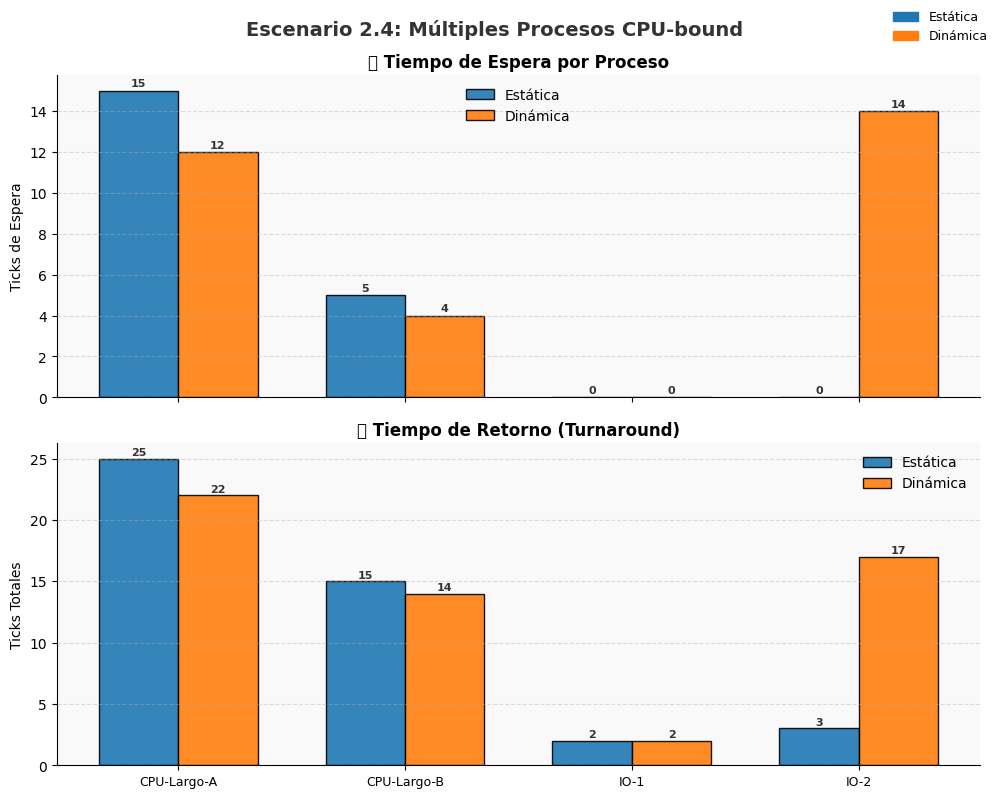


üìã Resultados: Prioridad Est√°tica (2.4)


PID  Llegada  Duraci√≥n  Prioridad Est√°tica  Inicio  Finalizaci√≥n  \
0  CPU-Largo-A        0        10                   5       0            25   
1  CPU-Largo-B        1        10                   4       1            16   
2         IO-1        3         2                   1       3             5   
3         IO-2        8         3                   2       8            11   

   Espera  Retorno  
0      15       25  
1       5       15  
2       0        2  
3       0        3


üìã Resultados: Prioridad Din√°mica (2.4)


PID  Llegada  Duraci√≥n  Prioridad Est√°tica  Inicio  Finalizaci√≥n  \
0  CPU-Largo-A        0        10                   5       0            22   
1  CPU-Largo-B        1        10                   4       1            15   
2         IO-1        3         2                   1       3             5   
3         IO-2        8         3                   2      22            25   

   Espera  Retorno  
0      12       22  
1       4       14  
2       0        2  
3      14       17

PID  Llegada  Duraci√≥n  Prioridad Est√°tica  Inicio  Finalizaci√≥n  \
0  CPU-Largo-A        0        10                   5       0            22   
1  CPU-Largo-B        1        10                   4       1            15   
2         IO-1        3         2                   1       3             5   
3         IO-2        8         3                   2      22            25   

   Espera  Retorno  
0      12       22  
1       4       14  
2       0        2  
3      14       17

In [ ]:
# --- 2.4 Definici√≥n del Experimento ---
titulo_2_4 = "Escenario 2.4: M√∫ltiples Procesos CPU-bound"
procesos_2_4 = [
    {"id": "CPU-Largo-A", "llegada": 0, "duracion": 10, "prioridad": 5}, # <-- El m√°s bajo
    {"id": "CPU-Largo-B", "llegada": 1, "duracion": 10, "prioridad": 4},

    {"id": "IO-1",        "llegada": 3, "duracion": 2,  "prioridad": 1}, # Interrupciones
    {"id": "IO-2",        "llegada": 8, "duracion": 3,  "prioridad": 2},
]

# --- Simulaci√≥n ---
lista_obj_est = crear_lista_procesos_desde_dict(procesos_2_4)
lista_obj_din = crear_lista_procesos_desde_dict(procesos_2_4)

res_est = simular_planificacion(lista_obj_est, 'estatica')
res_din = simular_planificacion(lista_obj_din, 'dinamica')

# --- Resultados ---
generar_grafico_escenario(titulo_2_4, res_est, res_din)
mostrar_tabla_resultados(res_est, "Resultados: Prioridad Est√°tica (2.4)")
mostrar_tabla_resultados(res_din, "Resultados: Prioridad Din√°mica (2.4)")

## Escenario: Alta concurrencia vs. Baja concurrencia
Comparar el rendimiento cuando los procesos llegan muy espaciados (Baja Concurrencia) contra cuando llegan todos al mismo tiempo o en un flujo constante (Alta Concurrencia).

### Experimento 1 (Baja Concurrencia (L√≠nea Base))  

Este es el caso "f√°cil" o l√≠nea base. Los procesos llegan tan espaciados que el proceso anterior casi siempre termina antes de que llegue el siguiente.

Qu√© observar:

Las barras de Est√°tica (Azul) y Din√°mica (Naranja) ser√°n casi id√©nticas.

Como no hay competencia (casi no hay cola de listos), el "envejecimiento" no tiene oportunidad de actuar y la prioridad casi no importa (solo importa el FCFS).

Los tiempos de espera para todos los procesos ser√°n cero o casi cero.

/tmp/ipython-input-3475987644.py:213: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3475987644.py:213: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


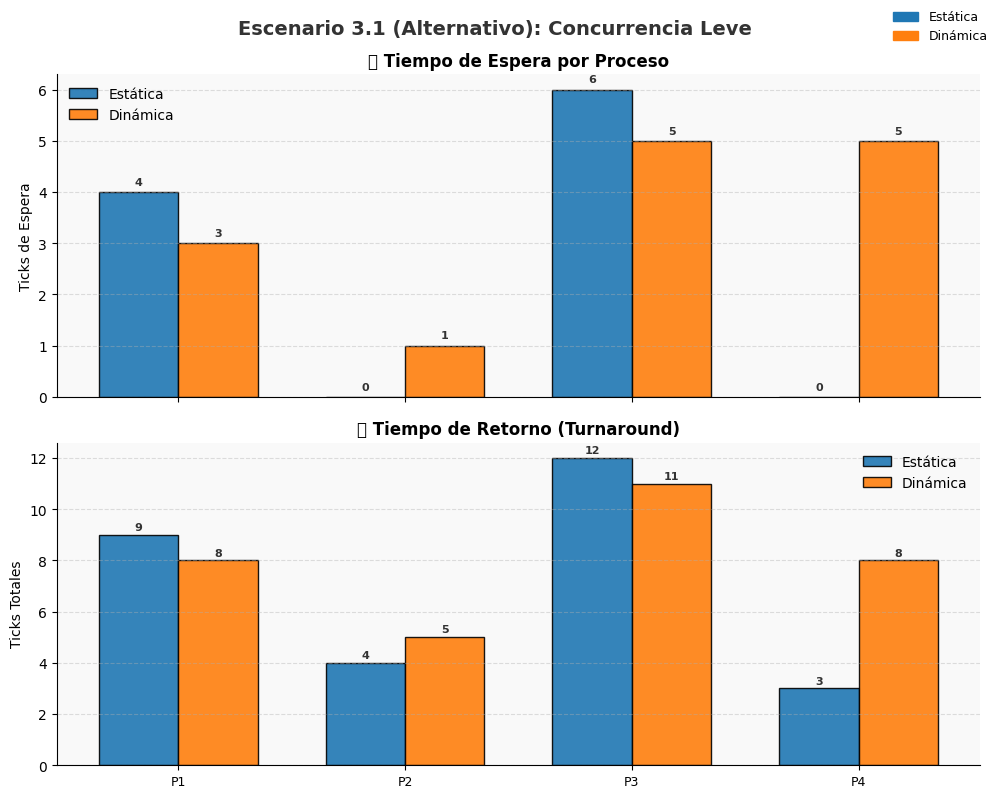


üìã Resultados: Prioridad Est√°tica (3.1 Alt)


PID  Llegada  Duraci√≥n  Prioridad Est√°tica  Inicio  Finalizaci√≥n  Espera  \
0  P1        0         5                   3       0             9       4   
1  P2        4         4                   1       4             8       0   
2  P3        6         6                   5       9            18       6   
3  P4       10         3                   2      10            13       0   

   Retorno  
0        9  
1        4  
2       12  
3        3


üìã Resultados: Prioridad Din√°mica (3.1 Alt)


PID  Llegada  Duraci√≥n  Prioridad Est√°tica  Inicio  Finalizaci√≥n  Espera  \
0  P1        0         5                   3       0             8       3   
1  P2        4         4                   1       4             9       1   
2  P3        6         6                   5       9            17       5   
3  P4       10         3                   2      11            18       5   

   Retorno  
0        8  
1        5  
2       11  
3        8

PID  Llegada  Duraci√≥n  Prioridad Est√°tica  Inicio  Finalizaci√≥n  Espera  \
0  P1        0         5                   3       0             8       3   
1  P2        4         4                   1       4             9       1   
2  P3        6         6                   5       9            17       5   
3  P4       10         3                   2      11            18       5   

   Retorno  
0        8  
1        5  
2       11  
3        8

In [ ]:
# --- 3.1 Definici√≥n del Experimento (Versi√≥n Alternativa con Solapamiento) ---
titulo_3_1_alt = "Escenario 3.1 (Alternativo): Concurrencia Leve"
procesos_3_1_alt = [
    # P1 (Baja Pri) empieza primero
    {"id": "P1", "llegada": 0, "duracion": 5, "prioridad": 3},

    # P2 (Alta Pri) llega ANTES de que P1 termine
    {"id": "P2", "llegada": 4, "duracion": 4, "prioridad": 1},

    # P3 (Baja Pri) llega mientras P2 est√° corriendo
    {"id": "P3", "llegada": 6, "duracion": 6, "prioridad": 5},

    # P4 (Media Pri) llega despu√©s de P2
    {"id": "P4", "llegada": 10, "duracion": 3, "prioridad": 2},
]

# --- Simulaci√≥n ---
lista_obj_est = crear_lista_procesos_desde_dict(procesos_3_1_alt)
lista_obj_din = crear_lista_procesos_desde_dict(procesos_3_1_alt)

res_est = simular_planificacion(lista_obj_est, 'estatica')
res_din = simular_planificacion(lista_obj_din, 'dinamica')

# --- Resultados ---
generar_grafico_escenario(titulo_3_1_alt, res_est, res_din)
mostrar_tabla_resultados(res_est, "Resultados: Prioridad Est√°tica (3.1 Alt)")
mostrar_tabla_resultados(res_din, "Resultados: Prioridad Din√°mica (3.1 Alt)")

### Experimento 2 (Alta Concurrencia (Tipo "Burst" o Explosi√≥n))  

Este es el opuesto directo al 3.1. Todos los procesos llegan exactamente al mismo tiempo (t=0), creando una "explosi√≥n" de trabajo.

Qu√© observar:

Este escenario es id√©ntico al "Conflicto Extremo" (1.1). Es la prueba de estr√©s de "alta concurrencia" m√°s pura.

Est√°tica (Azul): Mostrar√° una gran diferencia en los tiempos de espera, siguiendo estrictamente el orden de prioridad (P5 -> P2 -> P3 -> P1 -> P4).

Din√°mica (Naranja): El "envejecimiento" ser√° muy agresivo. Los procesos de baja prioridad (P1, P4) ser√°n "salvados" y sus tiempos de espera mejorar√°n dr√°sticamente.

/tmp/ipython-input-3475987644.py:213: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3475987644.py:213: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


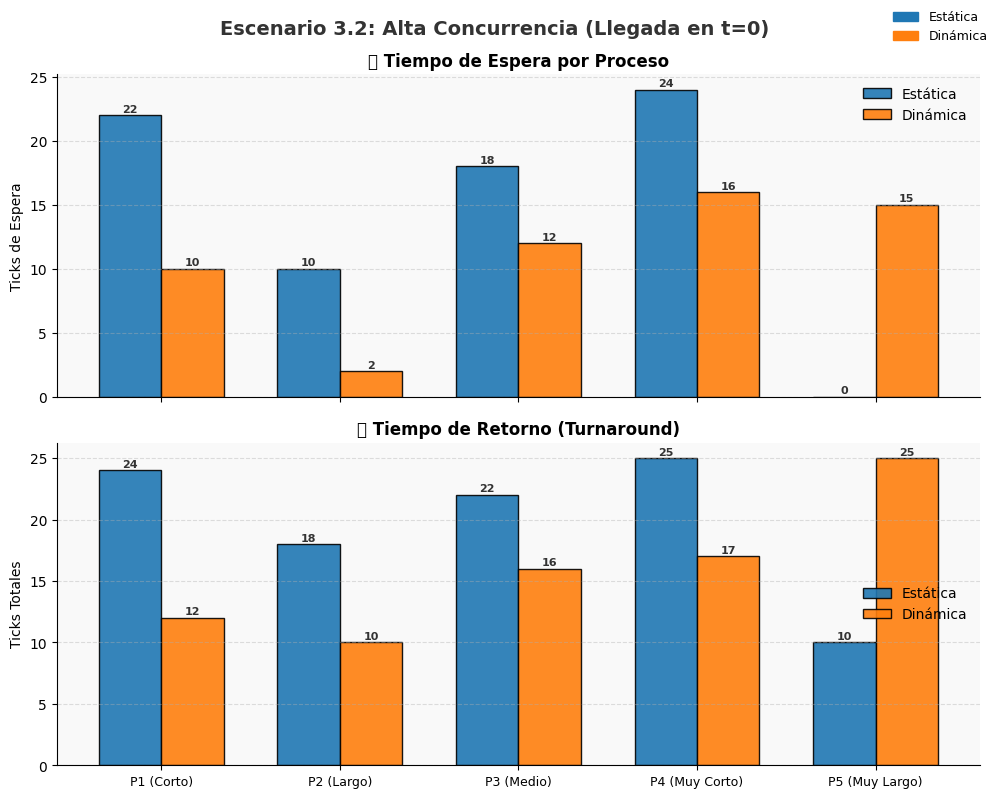


üìã Resultados: Prioridad Est√°tica (3.2)


PID  Llegada  Duraci√≥n  Prioridad Est√°tica  Inicio  \
0      P1 (Corto)        0         2                   4      22   
1      P2 (Largo)        0         8                   2      10   
2      P3 (Medio)        0         4                   3      18   
3  P4 (Muy Corto)        0         1                   5      24   
4  P5 (Muy Largo)        0        10                   1       0   

   Finalizaci√≥n  Espera  Retorno  
0            24      22       24  
1            18      10       18  
2            22      18       22  
3            25      24       25  
4            10       0       10


üìã Resultados: Prioridad Din√°mica (3.2)


PID  Llegada  Duraci√≥n  Prioridad Est√°tica  Inicio  \
0      P1 (Corto)        0         2                   4      10   
1      P2 (Largo)        0         8                   2       2   
2      P3 (Medio)        0         4                   3      12   
3  P4 (Muy Corto)        0         1                   5      16   
4  P5 (Muy Largo)        0        10                   1       0   

   Finalizaci√≥n  Espera  Retorno  
0            12      10       12  
1            10       2       10  
2            16      12       16  
3            17      16       17  
4            25      15       25

PID  Llegada  Duraci√≥n  Prioridad Est√°tica  Inicio  \
0      P1 (Corto)        0         2                   4      10   
1      P2 (Largo)        0         8                   2       2   
2      P3 (Medio)        0         4                   3      12   
3  P4 (Muy Corto)        0         1                   5      16   
4  P5 (Muy Largo)        0        10                   1       0   

   Finalizaci√≥n  Espera  Retorno  
0            12      10       12  
1            10       2       10  
2            16      12       16  
3            17      16       17  
4            25      15       25

In [ ]:
# --- 3.2 Definici√≥n del Experimento ---
titulo_3_2 = "Escenario 3.2: Alta Concurrencia (Llegada en t=0)"
procesos_3_2 = [
    # Todos llegan a la vez
    {"id": "P1 (Corto)", "llegada": 0, "duracion": 2, "prioridad": 4},
    {"id": "P2 (Largo)", "llegada": 0, "duracion": 8, "prioridad": 2},
    {"id": "P3 (Medio)", "llegada": 0, "duracion": 4, "prioridad": 3},
    {"id": "P4 (Muy Corto)","llegada": 0, "duracion": 1, "prioridad": 5}, # <-- Peor prioridad
    {"id": "P5 (Muy Largo)","llegada": 0, "duracion": 10,"prioridad": 1}, # <-- Mejor prioridad
]

# --- Simulaci√≥n ---
lista_obj_est = crear_lista_procesos_desde_dict(procesos_3_2)
lista_obj_din = crear_lista_procesos_desde_dict(procesos_3_2)

res_est = simular_planificacion(lista_obj_est, 'estatica')
res_din = simular_planificacion(lista_obj_din, 'dinamica')

# --- Resultados ---
generar_grafico_escenario(titulo_3_2, res_est, res_din)
mostrar_tabla_resultados(res_est, "Resultados: Prioridad Est√°tica (3.2)")
mostrar_tabla_resultados(res_din, "Resultados: Prioridad Din√°mica (3.2)")

### Experimento 3 (Alta Concurrencia (Flujo Constante = Inanici√≥n))  

Este escenario combina los dos anteriores. Demuestra el peligro de la alta concurrencia. No es una sola explosi√≥n en t=0, sino un flujo constante de nuevos procesos que mantiene el sistema siempre ocupado.

Qu√© observar:

Est√°tica (Azul): Ver√°s la inanici√≥n (starvation). La P-Victima (Pri 10) lleg√≥ en t=0, pero como el sistema est√° siempre ocupado con procesos de Flujo (Pri 5), la v√≠ctima nunca es elegida. Su barra de espera ser√° la m√°s grande de todos los experimentos.

Din√°mica (Naranja): El "envejecimiento" salvar√° a la P-Victima. Mientras los procesos de Flujo corren, su prioridad subir√° (10, 9, 8...) hasta que sea lo suficientemente alta (ej. Pri 4) para interrumpir al flujo y ejecutarse.

/tmp/ipython-input-3475987644.py:213: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3475987644.py:213: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


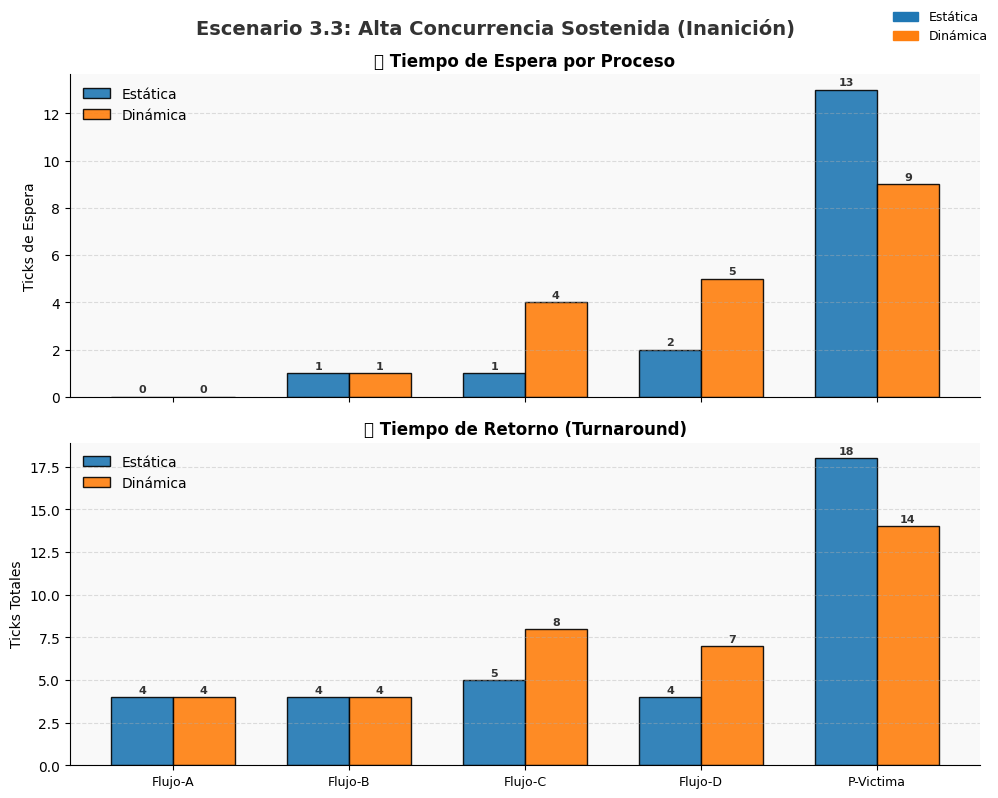


üìã Resultados: Prioridad Est√°tica (3.3)


PID  Llegada  Duraci√≥n  Prioridad Est√°tica  Inicio  Finalizaci√≥n  \
0    Flujo-A        2         4                   5       2             6   
1    Flujo-B        5         3                   5       6             9   
2    Flujo-C        8         4                   5       9            13   
3    Flujo-D       11         2                   5      13            15   
4  P-Victima        0         5                  10       0            18   

   Espera  Retorno  
0       0        4  
1       1        4  
2       1        5  
3       2        4  
4      13       18


üìã Resultados: Prioridad Din√°mica (3.3)


PID  Llegada  Duraci√≥n  Prioridad Est√°tica  Inicio  Finalizaci√≥n  \
0    Flujo-A        2         4                   5       2             6   
1    Flujo-B        5         3                   5       6             9   
2    Flujo-C        8         4                   5      11            16   
3    Flujo-D       11         2                   5      16            18   
4  P-Victima        0         5                  10       0            14   

   Espera  Retorno  
0       0        4  
1       1        4  
2       4        8  
3       5        7  
4       9       14

PID  Llegada  Duraci√≥n  Prioridad Est√°tica  Inicio  Finalizaci√≥n  \
0    Flujo-A        2         4                   5       2             6   
1    Flujo-B        5         3                   5       6             9   
2    Flujo-C        8         4                   5      11            16   
3    Flujo-D       11         2                   5      16            18   
4  P-Victima        0         5                  10       0            14   

   Espera  Retorno  
0       0        4  
1       1        4  
2       4        8  
3       5        7  
4       9       14

In [ ]:
# --- 3.3 Definici√≥n del Experimento ---
titulo_3_3 = "Escenario 3.3: Alta Concurrencia Sostenida (Inanici√≥n)"
procesos_3_3 = [
    {"id": "P-Victima", "llegada": 0, "duracion": 5, "prioridad": 10}, # <-- Prioridad 10 (muy mala)

    # "Alta concurrencia": Un flujo constante de prioridad media
    {"id": "Flujo-A",   "llegada": 2, "duracion": 4, "prioridad": 5},
    {"id": "Flujo-B",   "llegada": 5, "duracion": 3, "prioridad": 5},
    {"id": "Flujo-C",   "llegada": 8, "duracion": 4, "prioridad": 5},
    {"id": "Flujo-D",   "llegada": 11,"duracion": 2, "prioridad": 5},
]

# --- Simulaci√≥n ---
lista_obj_est = crear_lista_procesos_desde_dict(procesos_3_3)
lista_obj_din = crear_lista_procesos_desde_dict(procesos_3_3)

res_est = simular_planificacion(lista_obj_est, 'estatica')
res_din = simular_planificacion(lista_obj_din, 'dinamica')

# --- Resultados ---
generar_grafico_escenario(titulo_3_3, res_est, res_din)
mostrar_tabla_resultados(res_est, "Resultados: Prioridad Est√°tica (3.3)")
mostrar_tabla_resultados(res_din, "Resultados: Prioridad Din√°mica (3.3)")